In [1]:
from ase.io import read
from quippy.potential import Potential
import glob
import numpy as np
import re

pattern = re.compile('gen[0-9]+')

folders = [folder for folder in glob.glob('gen*') if pattern.match(folder)]
folders = sorted(folders, key = lambda string: int(string.strip('gen')))
print(folders)
energies = []
forces = []

temps = []
gens = []
highest_temp_so_far = 300
for folder in folders:

    sub_folders = sorted(glob.glob(f'{folder}/configTemp*'), key=lambda string: int(string.split('Temp')[1].split('KTime')[0]))
    highest_temp = int(sub_folders[-1].split('Temp')[1].split('KTime')[0])

    # if(highest_temp > highest_temp_so_far):
    highest_temp_so_far = highest_temp
    gens.append(int(folder.strip('gen')))
    temps.append(highest_temp_so_far)

print([(x,y) for x,y in zip(gens,temps)])


['gen0', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9', 'gen10', 'gen11', 'gen12', 'gen13', 'gen14', 'gen15', 'gen16', 'gen17', 'gen18', 'gen19', 'gen20', 'gen21', 'gen22', 'gen23', 'gen24', 'gen25', 'gen26']
[(0, 300), (1, 300), (2, 300), (3, 300), (4, 300), (5, 300), (6, 300), (7, 300), (8, 300), (9, 300), (10, 300), (11, 300), (12, 300), (13, 300), (14, 300), (15, 300), (16, 300), (17, 300), (18, 300), (19, 300), (20, 300), (21, 300), (22, 300), (23, 300), (24, 300), (25, 300), (26, 300)]


In [1]:
from ase.io import read
from quippy.potential import Potential
import glob
import numpy as np

folders = sorted(glob.glob('gen*'), key = lambda string: int(string.strip('gen')))

energies = []
forces = []
gen=[]

for folder in folders:
    try:
        print(folder)
        calc = Potential(param_filename=f'{folder}/GAP.xml')
        sub_folders = sorted(glob.glob(f'{folder}/configTemp*'),key=lambda string: ( int(string.split('Temp')[1].split('KT')[0]), int(string.split('Time')[1].split('ps')[0]) ))
        gen.append([int(folder.strip('gen'))]*len(sub_folders))
        for sub_folder in sub_folders:
            try:
                print(sub_folder)
                atoms = read(f'{sub_folder}/bestCommitteeMember.xyz')
                dft_e = atoms.get_potential_energy()
                dft_f = atoms.get_forces()
                atoms.calc = calc
                gap_e = atoms.get_potential_energy()
                gap_f = atoms.get_forces()
                print(np.abs((dft_e-gap_e)/len(atoms)))
                energies.append(np.abs((dft_e-gap_e)/len(atoms)))
                forces_dif = dft_f - gap_f
                forces_dif = np.abs(forces_dif)
                forces_dif = np.amax(forces_dif)
                forces.append(forces_dif)
                print(forces_dif)
            except:
                pass
    except:
        pass

gen0
gen0/configTemp300KTime1ps
0.00048596572999789106
0.24510811059089344
gen1
gen1/configTemp300KTime1ps
0.0044071716837758386
0.18112166168018373
gen1/configTemp300KTime3ps
0.0020198695392916
0.14952196564147646
gen1/configTemp300KTime7ps
0.0040751859064963964
0.3584420459489933
gen2
gen2/configTemp300KTime1ps
0.005328891131057389
0.3740196381828792
gen2/configTemp300KTime3ps
0.009226691488114133
0.2995282571020869
gen3
gen3/configTemp300KTime1ps
0.005471814919436231
0.205854336362224
gen4
gen4/configTemp300KTime1ps
0.001247669766371473
0.21900551910378974
gen4/configTemp300KTime3ps
0.0004337038063416306
0.1206774588798466
gen4/configTemp300KTime7ps
0.003615079135139846
0.2362099884740964
gen4/configTemp300KTime15ps
0.0009088440871588924
0.2328866021181205
gen5
gen5/configTemp300KTime1ps
0.0017118095301308738
0.31213051733721797
gen6
gen6/configTemp300KTime1ps
0.006169679684414102
0.21843835750751311
gen7
gen7/configTemp300KTime1ps
0.0023199769583470697
0.24829373137186406
gen8
gen8

Exception ignored in: <function Potential.__del__ at 0x7f2ae810d670>
Traceback (most recent call last):
  File "/home/vc381/miniconda3/lib/python3.8/site-packages/quippy/potential_module.py", line 258, in __del__
    quippy._quippy.f90wrap_potential_finalise(this=self._handle, error=error)
TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'


gen13/configTemp300KTime1ps
0.0004008945326935039
0.19658361662634538
gen13/configTemp300KTime3ps
0.0017141388728987295
0.1899316344184484
gen13/configTemp300KTime7ps
0.00035043227982593333
0.08328853445660461
gen13/configTemp300KTime15ps
0.0001556180978923294
0.21227653982741534
gen13/configTemp300KTime31ps
0.0008625425020530505
0.18267414763004017
gen13/configTemp300KTime63ps
0.0006228603778026809
0.11038863630745004
gen13/configTemp300KTime100ps
0.0046373911742042155
0.29072349102461426
gen14


[1, 3, 2, 1, 4, 1, 1, 1, 4, 6, 9, 3, 1, 7]
[ 1  4  6  7 11 12 13 14 18 24 33 36 37 44]
44
[ 0  1  4  6  7 11 12 13 14 18 24 33 36 37]
[ 0  1  4  6  7 11 12 13 14 18 24 33 36 37]
[ 0  1  4  6  7 11 12 13 14 18 24 33 36 37] 37
[ 0  1  4  6  7 11 12 13 14 18 24 33 36 37 31]


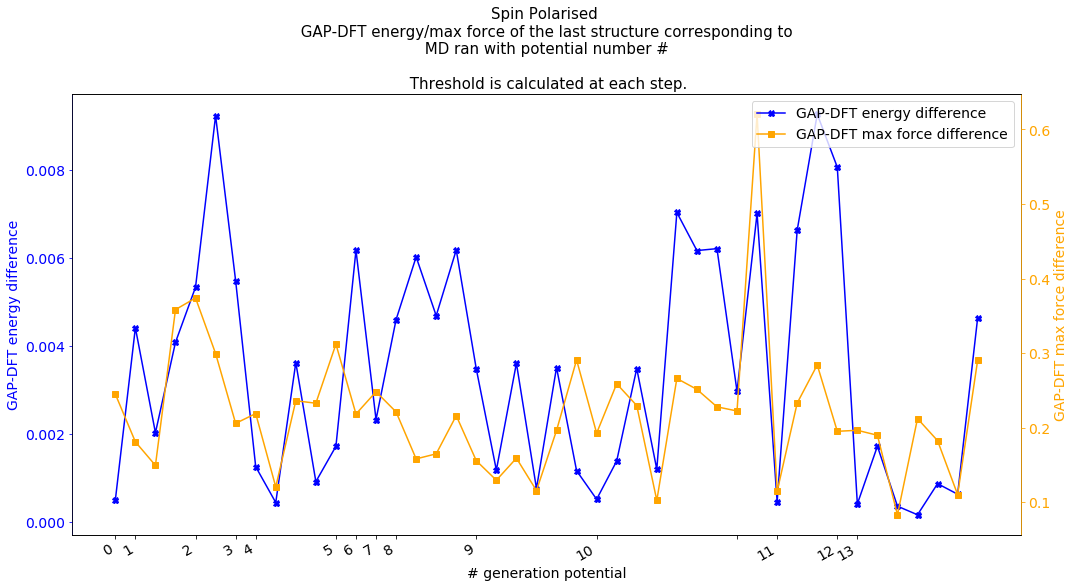

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(17,9))

ax2 = ax1.twinx()

ax1.set_xlabel('# generation potential',fontsize=14)
ax1.plot(energies,marker='X',c = 'blue',label='GAP-DFT energy difference ')
ax1.set_ylabel('GAP-DFT energy difference',fontsize=14)
ax2.plot(forces,marker='s',c='orange',label='GAP-DFT max force difference')
ax2.set_ylabel('GAP-DFT max force difference',fontsize=14)

x_ticks = [len(sub_folders) for sub_folders in gen]
print(x_ticks)

x_ticks = np.cumsum(x_ticks)
print(x_ticks)

last_element = x_ticks[-1]
print(last_element)
x_ticks = np.insert(x_ticks[:-1],0,0)
print(x_ticks)

temperature_ticks = np.array(x_ticks)
for counter in range(len(x_ticks)-1):
    sub_counter = 1
    while((x_ticks[counter]+sub_counter*7) < x_ticks[counter+1]):
        temperature_ticks = np.append(temperature_ticks,(x_ticks[counter]+sub_counter*7))
        sub_counter+=1

print(x_ticks)
sub_counter = 1
while((x_ticks[-1]+sub_counter*7) < last_element):
    temperature_ticks = np.append(temperature_ticks,(x_ticks[-1]+sub_counter*7))
    sub_counter+=1        

print(x_ticks,x_ticks[-1])
print(temperature_ticks)
x_ticks_labels = [sub_folders[0] for sub_folders in gen]
ticks = plt.xticks(temperature_ticks , x_ticks_labels,)
# plt.setp(ax1.get_xticklabels(), rotation=-70, horizontalalignment='right')
plt.xlabel(ticks,fontsize=0.5)

ax1.spines['left'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
ax1.tick_params(axis='both', labelsize=14)


ax2.spines['right'].set_color('orange')
ax2.yaxis.label.set_color('orange')
ax2.tick_params(axis='y', colors='orange',labelsize=14)

handles_list=[]
labels_list=[]
handles, labels = ax1.get_legend_handles_labels()
handles_list.extend(handles)
labels_list.extend(labels)
handles, labels = ax2.get_legend_handles_labels()
handles_list.extend(handles)
labels_list.extend(labels)

plt.title('Spin Polarised \n GAP-DFT energy/max force of the last structure corresponding to \n MD ran with potential number # \n\n Threshold is calculated at each step.',fontsize = 15)
fig.autofmt_xdate()

plt.legend(handles_list, labels_list,fontsize=14,loc='upper right')
plt.show()

In [6]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential
import os

traj = Trajectory('generatedS7DissociationFrom0To2P5InStepsOf0P005.traj')

aux = []
calc = Potential(param_filename='./gen25/GAP.xml')
for atoms in traj:
    atoms.calc = calc
    aux.append(atoms.get_potential_energy())

resultsDict={}
resultsDict['S6-Pol-LowerSigmaForce21072021-Gen25']=aux
print(resultsDict)

{'S6-Pol-LowerSigmaForce21072021-Gen25': [-2123.2362148844927, -2123.2637637985413, -2123.289240709266, -2123.3126994556133, -2123.334193248882, -2123.353774499439, -2123.3714946346204, -2123.3874070385377, -2123.40192760801, -2123.4153371912125, -2123.427654815865, -2123.438896792386, -2123.44907683736, -2123.4582061503097, -2123.466293452912, -2123.4733441140484, -2123.4792866621597, -2123.484104545945, -2123.4880268289053, -2123.491088633426, -2123.4932928646085, -2123.494644619506, -2123.4951510881288, -2123.494821366479, -2123.493666183421, -2123.491697551149, -2123.4889283431553, -2123.485371818572, -2123.4810410938308, -2123.475948582839, -2123.4701054131287, -2123.4635208320406, -2123.4562016218683, -2123.4481515256375, -2123.4394316929383, -2123.4301479173073, -2123.4202845892396, -2123.4098236897553, -2123.3987482105877, -2123.3870425616465, -2123.374692929151, -2123.3616875781086, -2123.348017085818, -2123.3336745002143, -2123.3186554132903, -2123.3029579431154, -2123.286582

In [2]:
from ase.io import read, write
from quippy.potential import Potential
import glob
import numpy as np
import re
from ase.io import Trajectory


filter_string = re.compile("gen[0-9]+")

folders = [folder for folder in glob.glob(
    'gen*') if filter_string.match(folder)]
folders = sorted(folders, key=lambda string: int(string.strip('gen')))
dft_traj = Trajectory('dft_traj.traj', 'w')
for folder in folders[:-1]:
    try:
        print(folder)
        calc = Potential(param_filename=f'{folder}/GAP.xml')
        sub_folders = sorted(glob.glob(f'{folder}/configTemp*'), key=lambda string: (int(
            string.split('Temp')[1].split('KT')[0]), int(string.split('Time')[1].split('ps')[0])))
        for sub_folder in sub_folders:
            try:
                print(sub_folder)
                atoms = read(f'{sub_folder}/bestCommitteeMember.xyz')
                atoms.info['gen'] = int(folder.strip('gen'))
                dft_traj.write(atoms)
            except:
                pass
    except:
        pass
print(len(dft_traj))
dft_traj.close()
dft_traj = Trajectory('dft_traj.traj')
write('/home/vc381/Calculations/04062021Sulfur8+Sulfur6/29072021-CombiningResultsOfSeparatedS6andS8iterativeMDsFrom21And23July-LowerBoundsOfSigmaForceThanPreviously/21072021S6DFTtrajPol.traj', dft_traj)


gen0
gen0/configTemp300KTime1ps
gen1
gen1/configTemp300KTime1ps
gen1/configTemp300KTime3ps
gen1/configTemp300KTime7ps
gen2
gen2/configTemp300KTime1ps
gen3
gen3/configTemp300KTime1ps
gen4
gen4/configTemp300KTime1ps
gen4/configTemp300KTime3ps
gen5
gen5/configTemp300KTime1ps
gen5/configTemp300KTime3ps
gen5/configTemp300KTime7ps
gen6
gen6/configTemp300KTime1ps
gen7
gen7/configTemp300KTime1ps
gen7/configTemp300KTime3ps
gen7/configTemp300KTime7ps
gen7/configTemp300KTime15ps
gen8
gen8/configTemp300KTime1ps
gen8/configTemp300KTime3ps
gen8/configTemp300KTime7ps
gen8/configTemp300KTime15ps
gen9
gen9/configTemp300KTime1ps
gen9/configTemp300KTime3ps
gen9/configTemp300KTime7ps
gen10
gen10/configTemp300KTime1ps
gen11
gen11/configTemp300KTime1ps
gen11/configTemp300KTime3ps
gen11/configTemp300KTime7ps
gen11/configTemp300KTime15ps
gen11/configTemp300KTime31ps
gen11/configTemp300KTime63ps
gen11/configTemp300KTime100ps
gen12
gen12/configTemp300KTime1ps
gen12/configTemp300KTime3ps
gen12/configTemp300KTime

In [3]:
#taken from quip webpage
#This block of code served to get all the RMSE's in the table on 19.02.2021 from logbook. I after moved the files to the corresponding folders.

import matplotlib.pyplot as plt
from ase.io import read
import numpy as np
import matplotlib as mpl


def rms_dict(x_ref, x_pred):
    """ Takes two datasets of the same shape and returns a dictionary containing RMS error data"""

    x_ref = np.array(x_ref)
    x_pred = np.array(x_pred)

    if np.shape(x_pred) != np.shape(x_ref):
        raise ValueError('WARNING: not matching shapes in rms')

    error_2 = (x_ref - x_pred) ** 2

    average = np.sqrt(np.average(error_2))
    std_ = np.sqrt(np.var(error_2))

    return {'rmse': average, 'std': std_}


def energy_plot(in_atoms, out_atoms, ax, title='Plot of energy', current_gen=0):
    """ Plots the distribution of energy per atom on the output vs the input"""
    # read files
#     in_atoms = read(in_file, ':')
#     out_atoms = read(out_file, ':')
    # list energies
    ener_in = [at.get_potential_energy() / len(at.get_chemical_symbols())
               for at in in_atoms]
    ener_out = [at.get_potential_energy() / len(at.get_chemical_symbols())
                for at in out_atoms]
    # scatter plot of the data
    cmap = plt.get_cmap('coolwarm')
    # cmap2 = plt.get_cmap('PRGn')
    color = []
    for at in in_atoms:
        if(at.info['gen'] < current_gen):
            try:
                color.append(0)
            except:
                print("Warning: isolated atoms has no 'info[gen]'")
                color.append(0)
                pass
        if(at.info['gen'] >= current_gen):

            try:
                color.append(1)
            except:
                print("Warning: isolated atoms has no 'distance'")
                color.append(1)
                pass
#     #in force and out force have shape 824,3 whereas color has shape 2472,1
#     ener_in = np.array(in_force)
#     out_force = np.array(out_force)
#     color = np.array(color)
#     in_force = in_force.flatten()
#     out_force = out_force.flatten()

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    im = ax.scatter(ener_in, ener_out, c=color, cmap='coolwarm', norm=norm, marker='x'
                    )
#     #colorbar
#     cbar = plt.colorbar(im, ax=ax, orientation='vertical')
#     cbar.set_label("React Coordinate S8 (A)",fontsize=13)

    # get the appropriate limits for the plot
    for_limits = np.array(ener_in + ener_out)
    elim = (for_limits.min() - 0.05, for_limits.max() + 0.05)
    ax.set_xlim(elim)
    ax.set_ylim(elim)
    # add line of slope 1 for refrence
    ax.plot(elim, elim, c='k')
    # set labels
    ax.set_ylabel('energy by GAP / eV')
    ax.set_xlabel('energy by DFT / eV')
    #set title
    ax.set_title(title)
    # add text about RMSE
    _rms = rms_dict(ener_in, ener_out)
    rmse_text = 'RMSE:\n' + str(np.round(_rms['rmse'], 3)) + 'eV/atom'
    print(str(np.round(_rms['rmse'], 3)))
    ax.text(0.8, 0.3, rmse_text, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom')
    past_in = np.array(ener_in)[
        [True if atoms.info['gen'] < current_gen else False for atoms in in_atoms]]
    future_in = np.array(ener_in)[
        [True if atoms.info['gen'] >= current_gen else False for atoms in in_atoms]]
    past_out = np.array(ener_out)[
        [True if atoms.info['gen'] < current_gen else False for atoms in out_atoms]]
    future_out = np.array(ener_out)[
        [True if atoms.info['gen'] >= current_gen else False for atoms in out_atoms]]
    _rmspast = rms_dict(past_in, past_out)
    _rmsfuture = rms_dict(future_in, future_out)
    rmse_textpast = 'RMSE past:\n' + \
        str(np.round(_rmspast['rmse'], 3)) + 'eV/atom'
    rmse_textfuture = 'RMSE future:\n' + \
        str(np.round(_rmsfuture['rmse'], 3)) + 'eV/atom'
    ax.text(0.65, 0.03, rmse_textpast, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom', color='blue')
    ax.text(0.95, 0.03, rmse_textfuture, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom', color='red')


def force_plot(in_atoms, out_atoms, ax, symbol='S', title='Plot of force', current_gen=0):
    """ Plots the distribution of firce components per atom on the output vs the input
        only plots for the given atom type(s)"""

#     in_atoms = read(in_file, ':')
#     out_atoms = read(out_file, ':')

    # extract data for only one species
    in_force, out_force = [], []
    for at_in, at_out in zip(in_atoms, out_atoms):
        # get the symbols
        sym_all = at_in.get_chemical_symbols()
        # add force for each atom
        for j, sym in enumerate(sym_all):
            if sym in symbol:
                in_force.append(at_in.get_forces()[j])
                out_force.append(at_out.get_forces()[j])
#                 out_force.append(at_out.arrays['force'][j])# because QUIP and ASE use different names
    # convert to np arrays, much easier to work with
    #in_force = np.array(in_force)
    #out_force = np.array(out_force)
    # scatter plot of the data
    cmap = plt.get_cmap('coolwarm')
    color = []
    for at in in_atoms:
        if(at.info['gen'] < current_gen):
            try:
                for atom in at:
                    color.append(0)
                    color.append(0)
                    color.append(0)
            except:
                print("Warning: isolated atoms has no 'distance'")
                color.append(0)
                color.append(0)
                color.append(0)
                pass
        if(at.info['gen'] >= current_gen):
            try:
                for atom in at:
                    color.append(1)
                    color.append(1)
                    color.append(1)
            except:
                print("Warning: isolated atoms has no 'distance'")
                color.append(0)
                color.append(0)
                color.append(0)
                pass

    #in force and out force have shape 824,3 whereas color has shape 2472,1
    in_force = np.array(in_force)
    out_force = np.array(out_force)
    color = np.array(color)
    in_force = in_force.flatten()
    out_force = out_force.flatten()

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    im = ax.scatter(in_force, out_force, c=color, cmap='coolwarm', norm=norm,  marker='x'
                    )
    #colorbar
#     cbar = plt.colorbar(im, ax=ax, orientation='vertical')
#     cbar.set_label("React Coordinate S8 (A)",fontsize=13)
#     cbar = plt.colorbar(im2, ax=ax, orientation='vertical')
#     cbar.set_label("React Coordinate S6 (A)",fontsize=13)

    # get the appropriate limits for the plot
    for_limits = np.array(in_force + out_force)
    flim = (for_limits.min() - 1, for_limits.max() + 1)
    ax.set_xlim(flim)
    ax.set_ylim(flim)
    # add line of
    ax.plot(flim, flim, c='k')
    # set labels
    ax.set_ylabel('force by GAP / (eV/Å)')
    ax.set_xlabel('force by DFT / (eV/Å)')
    #set title
    ax.set_title(title)
    # add text about RMSE
    _rms = rms_dict(in_force, out_force)
    rmse_text = 'RMSE:\n' + str(np.round(_rms['rmse'], 3)) + 'eV/Å'
    print(str(np.round(_rms['rmse'], 3)))
    ax.text(0.8, 0.3, rmse_text, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom')

    indexing_array = np.array([[True]*len(atoms)*3 if atoms.info['gen'] <
                               current_gen else [False]*len(atoms)*3 for atoms in in_atoms]).flatten()
    past_in = np.array(in_force)[indexing_array]
#     print(past_in)
    indexing_array = np.array([[True]*len(atoms)*3 if atoms.info['gen'] >=
                               current_gen else [False]*len(atoms)*3 for atoms in in_atoms]).flatten()
    future_in = np.array(in_force)[indexing_array]
#     print(future_in)
    indexing_array = np.array([[True]*len(atoms)*3 if atoms.info['gen'] <
                               current_gen else [False]*len(atoms)*3 for atoms in out_atoms]).flatten()
    past_out = np.array(out_force)[indexing_array]
    indexing_array = np.array([[True]*len(atoms)*3 if atoms.info['gen'] >=
                               current_gen else [False]*len(atoms)*3 for atoms in out_atoms]).flatten()
    future_out = np.array(out_force)[indexing_array]
    _rmsPast = rms_dict(past_in, past_out)
    _rmsFuture = rms_dict(future_in, future_out)
    rmse_textPast = 'RMSE past:\n' + \
        str(np.round(_rmsPast['rmse'], 3)) + 'eV/Å'
    rmse_textFut = 'RMSE future:\n' + \
        str(np.round(_rmsFuture['rmse'], 3)) + 'eV/Å'
    ax.text(0.65, 0.03, rmse_textPast, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom', color='blue')
    ax.text(0.95, 0.03, rmse_textFut, transform=ax.transAxes, fontsize='large', horizontalalignment='right',
            verticalalignment='bottom', color='red')


[0, 1, 1, 1, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 16, 17, 18, 18, 18, 19, 20, 20, 20, 20, 20, 21, 22, 22, 23, 23, 23, 24, 24, 25, 25, 25]
['gen0', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9', 'gen10', 'gen11', 'gen12', 'gen13', 'gen14', 'gen15', 'gen16', 'gen17', 'gen18', 'gen19', 'gen20', 'gen21', 'gen22', 'gen23', 'gen24', 'gen25', 'gen26']
0.007


/home/vc381/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/vc381/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vc381/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/vc381/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/vc381/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.127
0.004
0.119
0.004
0.117
0.004
0.106
0.004
0.105
0.004
0.104
0.003
0.099
0.003
0.09
0.003
0.086
0.003
0.085
0.002
0.081
0.002
0.08
0.002
0.079
0.002
0.072
0.002
0.072
0.002
0.072
0.002
0.071
0.002
0.068
0.002
0.067
0.002
0.067
0.002
0.066
0.002
0.065
0.002
0.064
0.002
0.062
0.002
0.061
0.002
0.06


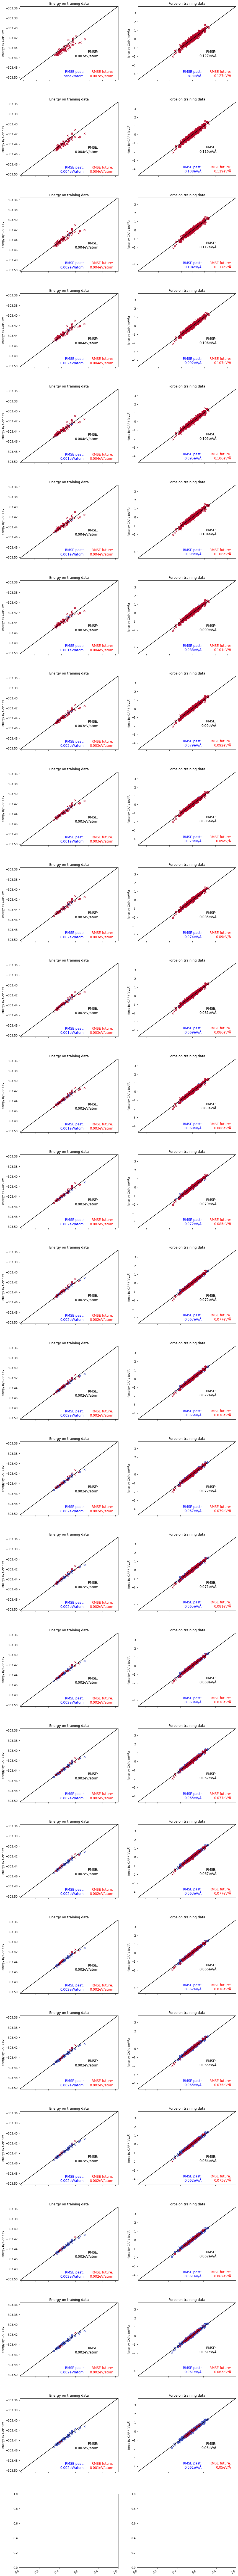

In [4]:
import matplotlib.pyplot as plt
import ase
from mpl_toolkits.axes_grid1 import make_axes_locatable
from quippy.potential import Potential
import re
import glob

dft_traj = ase.io.Trajectory('dft_traj.traj')

print([atoms.info['gen'] for atoms in dft_traj])


filter_string = re.compile("gen[0-9]")

folders = [folder for folder in glob.glob(
    'gen*') if filter_string.match(folder)]
folders = sorted(folders, key=lambda string: int(string.strip('gen')))
print(folders)

fig, ax_list = plt.subplots(
    nrows=len(folders), ncols=2, gridspec_kw={'hspace': 0.3})
fig.set_size_inches(14, 7*len(folders))

fig_counter = 0
for folder in folders[:-1]:
    # try:
    calc = Potential(param_filename=f'{folder}/GAP.xml')
    gap_traj = []
    for atoms in dft_traj:
        gap_atoms = ase.Atoms(atoms)
        del gap_atoms.calc
        gap_atoms.calc = calc
        gap_traj.append(gap_atoms)

    current_gen = int(folder.strip('gen'))

    energy_plot(dft_traj, gap_traj, ax_list[fig_counter][0],
                'Energy on training data', current_gen=current_gen)
    force_plot(dft_traj, gap_traj, ax_list[fig_counter][1],
               'S', 'Force on training data', current_gen=current_gen)
    fig.autofmt_xdate()
    fig_counter += 1
    # except:
    #     print('LABA')
    #     pass


# plt.savefig('S6-IterativeMD-MediumThreshold-NonPolarised-GAP-predictions.pdf')


### 07.05.2021 Let's test the different potentials on a traj made up of sampled DFT MD non polarised between 300K and 1400K

In [7]:

import glob


filter_string = re.compile("gen[0-9]+")

folders = [folder for folder in glob.glob('gen*') if filter_string.match(folder)]
folders = sorted(folders, key=lambda string: int(string.strip('gen')))
print(folders)

dirs = folders[:-1]

['gen0', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9', 'gen10', 'gen11', 'gen12', 'gen13', 'gen14', 'gen15', 'gen16', 'gen17', 'gen18', 'gen19', 'gen20', 'gen21', 'gen22', 'gen23', 'gen24', 'gen25', 'gen26']


In [9]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential
import os

os.environ['OMP_NUM_THREADS']="1"
traj = Trajectory('08052021PolDFTMDSampled110StructsBetween300and1400K.traj')

resultsDict = {}
for gen in dirs:

    print(gen)
    

    gen_int = int(gen.strip('./gen'))
    
    aux = []
    for atoms in traj:
        atoms.calc = Potential(param_filename=gen + '/GAP.xml')
        aux.append(atoms.get_potential_energy())
        
    resultsDict[f'gen{gen_int}'] = aux
    
print(resultsDict)

gen0
gen1
gen2
gen3
gen4
gen5
gen6
gen7
gen8
gen9
gen10
gen11
gen12
gen13
gen14
gen15
gen16
gen17
gen18
gen19
gen20
gen21
gen22
gen23
gen24
gen25
{'gen0': [-2427.07127131675, -2426.901010953935, -2426.922536776004, -2427.1297905208116, -2427.1201797990243, -2427.343142520582, -2427.4621636134584, -2427.090392894267, -2427.1662949774814, -2427.23788676096, -2426.7877185480797, -2426.9453184862114, -2426.923811685351, -2426.5606911103796, -2426.8127476221057, -2426.5223168659263, -2426.711978982985, -2426.8907274011326, -2426.880629924233, -2427.4874232116063, -2427.3836439084635, -2426.8640576383123, -2426.619458520647, -2426.4812888191655, -2426.478373970939, -2426.7196235142346, -2426.9913324113304, -2427.0477966052067, -2427.336859167339, -2427.1523668848263, -2427.0388495839743, -2427.2439770917044, -2426.5929395158428, -2427.307664832341, -2427.1822789596995, -2427.1838269638884, -2427.1068366255413, -2426.898713209935, -2426.9583210823944, -2427.12974538617, -2426.7154106376624, -

In [10]:
resultsDict = {'gen0': [-2427.07127131675, -2426.901010953935, -2426.922536776004, -2427.1297905208116, -2427.1201797990243, -2427.343142520582, -2427.4621636134584, -2427.090392894267, -2427.1662949774814, -2427.23788676096, -2426.7877185480797, -2426.9453184862114, -2426.923811685351, -2426.5606911103796, -2426.8127476221057, -2426.5223168659263, -2426.711978982985, -2426.8907274011326, -2426.880629924233, -2427.4874232116063, -2427.3836439084635, -2426.8640576383123, -2426.619458520647, -2426.4812888191655, -2426.478373970939, -2426.7196235142346, -2426.9913324113304, -2427.0477966052067, -2427.336859167339, -2427.1523668848263, -2427.0388495839743, -2427.2439770917044, -2426.5929395158428, -2427.307664832341, -2427.1822789596995, -2427.1838269638884, -2427.1068366255413, -2426.898713209935, -2426.9583210823944, -2427.12974538617, -2426.7154106376624, -2426.8113302172756, -2426.3655337920645, -2426.981505205013, -2426.8124807721433, -2426.7063900644353, -2426.737332704722, -2427.1883790511306, -2426.565366079597, -2426.9833295720764, -2427.3636583308016, -2426.914975310924, -2426.51958854395, -2426.917421753058, -2426.6633872672955, -2426.5334147370136, -2426.8655081862107, -2426.676635071665, -2426.8921913330114, -2426.812727291894, -2426.5519596449876, -2425.458100132547, -2426.2262833640457, -2426.6548884369718, -2426.684195688995, -2426.9186697110476, -2426.0167286859037, -2426.3521023551607, -2426.6928712334807, -2426.879128496699, -2427.0307237380657, -2427.1357559168027, -2426.790506104505, -2426.7540169279278, -2426.278823402885, -2426.3798499682807, -2426.1260726523, -2426.2342868451074, -2426.064499829008, -2426.2841472430982, -2426.445658207362, -2425.912118327143, -2426.1265969787073, -2426.012503539453, -2426.5638054153787, -2426.913006849214, -2426.9873581047523, -2426.430056277859, -2426.9695838772045, -2426.3497603256947, -2426.0154385126475, -2426.463424737256, -2426.1281178910467, -2426.582383435615, -2426.381782476813, -2426.142987098621, -2426.3817352686583, -2426.33535749842, -2425.7356570518573, -2426.085431532167, -2425.9270035540326, -2426.1564705315486, -2426.7605265514753, -2426.212789192853, -2425.7049157642364, -2425.8082731431696, -2426.4791303620555, -2426.5649795430036, -2426.4057764839295, -2426.0120051040944, -2424.973541145182, -2424.570703776541, -2425.6674568278986, -2425.402304801077, -2425.430587097769, -2425.3417047687967, -2426.6137787233056, -2426.3888745600907, -2426.79294775163, -2426.6253600956725], 'gen1': [-2427.6770328368257, -2427.4907948148957, -2427.5057116164285, -2427.7193815776327, -2427.69083460147, -2427.8868559615353, -2427.9997598318228, -2427.633311291949, -2427.72593749775, -2427.7839869246263, -2427.371260586701, -2427.5323475964055, -2427.496939830584, -2427.153434995897, -2427.406264278715, -2427.1019210660916, -2427.281922319668, -2427.4730949263385, -2427.460995806703, -2427.9865780212695, -2427.9195993268645, -2427.4400119436013, -2427.1788583065945, -2427.047316873756, -2427.0596106530866, -2427.3004515639905, -2427.558108092716, -2427.617647491388, -2427.831307362228, -2427.750585268348, -2427.524041812634, -2427.739346294259, -2427.1551875737055, -2427.846604425885, -2427.606229571808, -2427.75037147414, -2427.5932602300145, -2427.4396315871486, -2427.4496672672035, -2427.5840332107564, -2427.264520178227, -2427.330868108132, -2426.8456394611026, -2427.4947254515637, -2427.3473258457366, -2427.1963704611517, -2427.258477093473, -2427.679293133533, -2427.084746435005, -2427.448939622897, -2427.844887317681, -2427.4229856075103, -2426.888433589679, -2427.340595150034, -2427.1745261431383, -2427.0599651866664, -2427.389817437809, -2427.1515037341633, -2427.3766480117947, -2427.362005020005, -2427.030831541849, -2425.9006463278706, -2426.7516410997687, -2427.125401590949, -2427.1553654184663, -2427.306909960252, -2426.4860549213054, -2426.8834755515186, -2427.1686296776998, -2427.3650564576974, -2427.464606240975, -2427.633854993572, -2427.315519339256, -2427.150974705983, -2426.811470224131, -2426.918014789954, -2426.6328915275, -2426.6751504945096, -2426.557622277808, -2426.8449236194624, -2426.953751559812, -2426.3266759502358, -2426.6801996703075, -2426.565957184536, -2427.1262998187885, -2427.36441908403, -2427.262079137664, -2426.767054382528, -2427.3369858769283, -2426.6229349460054, -2426.371809323678, -2426.7880287029907, -2426.5442539027526, -2427.0085002066667, -2426.864774837431, -2426.6295742651237, -2426.724096900657, -2426.6475560494378, -2426.0168121358934, -2426.367470474211, -2426.266175538282, -2426.596274438587, -2427.129748630823, -2426.617939423676, -2426.0036355801926, -2426.1845771782782, -2426.8449787589293, -2427.011337325589, -2426.7280124536715, -2426.266299363917, -2425.257957479311, -2424.9664746000226, -2426.0935102733065, -2425.659488287523, -2425.734688090584, -2425.7527690430893, -2427.10898721191, -2426.7911028792714, -2427.2206846786908, -2427.163986300113], 'gen2': [-2427.317749394841, -2427.149097747558, -2427.1478403380243, -2427.397433239921, -2427.317801395118, -2427.581735422627, -2427.6736273903534, -2427.3207271447977, -2427.399878831529, -2427.428578027895, -2427.0456947221655, -2427.1996897941985, -2427.149091479231, -2426.8142642803614, -2427.0399944033425, -2426.7493261156355, -2426.933203886937, -2427.1440981234023, -2427.1524763751822, -2427.6903323468223, -2427.5740547485484, -2427.091927965193, -2426.832993083846, -2426.662824390004, -2426.708968146047, -2426.930743920818, -2427.2181571859182, -2427.2312804647627, -2427.550737495264, -2427.395654619574, -2427.204296910641, -2427.425667391666, -2426.871669490895, -2427.52749852105, -2427.3532771105647, -2427.450172360431, -2427.316602707644, -2427.1419882164896, -2427.1829976829895, -2427.340325727289, -2426.955934639602, -2426.934488961331, -2426.5215716485354, -2427.1856027194453, -2427.0192979668595, -2426.907670711398, -2426.894819788713, -2427.366525874433, -2426.789196074223, -2427.1427204049987, -2427.542553508191, -2427.098498202772, -2426.587109055003, -2427.0888932023863, -2426.7731495713333, -2426.708917068613, -2427.0255316215625, -2426.8237396009204, -2427.038927388085, -2427.0316321420264, -2426.7285074613847, -2425.7045005030127, -2426.3966724049046, -2426.8392809555335, -2426.8809223843955, -2427.071502514151, -2426.135660431862, -2426.4646427952557, -2426.8594585066594, -2427.008153287333, -2427.235697031751, -2427.366170472478, -2426.9625181570837, -2426.86870377054, -2426.4206839246694, -2426.520059441888, -2426.294251572933, -2426.383086960719, -2426.2734881440088, -2426.3793564121265, -2426.620450041299, -2425.959756571263, -2426.1826901973513, -2426.19853624882, -2426.7395095807087, -2427.066047537977, -2427.092310528899, -2426.570611874594, -2427.085604160965, -2426.4641182018254, -2426.1876045618887, -2426.6221574663505, -2426.282930089613, -2426.726147441835, -2426.543600565307, -2426.3221142506964, -2426.4975861381695, -2426.500300283244, -2425.8352071569625, -2426.2048914910756, -2426.040142451424, -2426.3520070851378, -2426.9015401042393, -2426.371454952714, -2425.7558520025123, -2425.9650200503042, -2426.5850166863474, -2426.7308113627632, -2426.490148395856, -2426.0601300727744, -2425.0277891593346, -2424.67463326428, -2425.7498807922416, -2425.3971617511706, -2425.4066655635384, -2425.398345162306, -2426.787103322007, -2426.521171163784, -2426.8705456914163, -2426.791414957749], 'gen3': [-2427.445415476081, -2427.2734286807395, -2427.2713029360666, -2427.5114876344633, -2427.4449085876035, -2427.686280488839, -2427.7873705456873, -2427.431672299866, -2427.5154738725228, -2427.553579459439, -2427.1640638738245, -2427.3196936472496, -2427.2709304492387, -2426.943407564028, -2427.1744837887204, -2426.881719818392, -2427.062843890013, -2427.2636840732152, -2427.2657695270564, -2427.791579532181, -2427.6945761856973, -2427.217190660979, -2426.96413418612, -2426.80169886136, -2426.842095770843, -2427.0653186811396, -2427.341390719797, -2427.3704251735453, -2427.6470788224074, -2427.520345587901, -2427.321572726279, -2427.5377223729956, -2426.9824979943087, -2427.640441939987, -2427.426972025786, -2427.556521474335, -2427.4117396362685, -2427.2505259592676, -2427.2727577754144, -2427.4176152258974, -2427.067360929824, -2427.070530846142, -2426.6426854972306, -2427.2937799687584, -2427.1425452652893, -2427.02376578485, -2427.0324514035633, -2427.480140754629, -2426.9028257417494, -2427.256679465772, -2427.6556899700286, -2427.2213531461157, -2426.696702442099, -2427.1688205749583, -2426.912047467872, -2426.839576744257, -2427.155952377737, -2426.936500228654, -2427.1609199302516, -2427.1550543598078, -2426.845881066542, -2425.7796394191855, -2426.535684618053, -2426.9433006267236, -2426.9871762958096, -2427.1392536667886, -2426.2719818303135, -2426.6171062488497, -2426.9715263708927, -2427.1272701226253, -2427.3104191399348, -2427.460952338752, -2427.0878024226386, -2426.964971957243, -2426.559566266897, -2426.667731736165, -2426.428358888646, -2426.506380231498, -2426.392117949885, -2426.5404276929976, -2426.749967548859, -2426.086861130324, -2426.3360895524634, -2426.3283713243486, -2426.8740930411795, -2427.178493968495, -2427.1332855737146, -2426.641118769929, -2427.161160329163, -2426.5216934690343, -2426.2708334228064, -2426.6626367156823, -2426.3563262328294, -2426.8179935589874, -2426.6663653177598, -2426.4526008515354, -2426.583411974848, -2426.562922108824, -2425.9049715943293, -2426.2737157351053, -2426.1189249335184, -2426.4388974110625, -2426.963087891964, -2426.446218296454, -2425.8405368970525, -2426.0390134342947, -2426.672216820713, -2426.830325636596, -2426.569928579465, -2426.1299630332355, -2425.1359369533698, -2424.801201455282, -2425.877973724878, -2425.501127724224, -2425.531963233395, -2425.5393858781044, -2426.9047440733475, -2426.612487248277, -2426.9836753967033, -2426.9223664568513], 'gen4': [-2427.606884117301, -2427.427463451183, -2427.4314253576617, -2427.6636911667215, -2427.5999253542263, -2427.828813590705, -2427.934030897305, -2427.5733032846747, -2427.663405350662, -2427.7096803439877, -2427.3179965647514, -2427.4755640997764, -2427.425683550972, -2427.1051540038707, -2427.340706413919, -2427.046663355965, -2427.2205235271617, -2427.4171954057942, -2427.413023559406, -2427.9267825056118, -2427.8446686148295, -2427.3704933246368, -2427.1210235911144, -2426.9698117876196, -2427.006180243545, -2427.231153723351, -2427.492943994175, -2427.5337817035825, -2427.7778903996486, -2427.6813608415687, -2427.465958324992, -2427.680187060258, -2427.124496323546, -2427.780635090006, -2427.5492162563764, -2427.6963548094673, -2427.543893468666, -2427.392288697354, -2427.4045377700595, -2427.539952612691, -2427.206239360248, -2427.2391786274975, -2426.797629085624, -2427.441801815156, -2427.289853347099, -2427.165382679069, -2427.1934620886873, -2427.6224338846387, -2427.050010283663, -2427.3992716754015, -2427.796356980097, -2427.36457928332, -2426.834996406482, -2427.296821108357, -2427.0666965240785, -2426.998298846482, -2427.3045456013933, -2427.0739357354755, -2427.310386348161, -2427.309052405288, -2426.995980185662, -2425.92646704999, -2426.6997419751365, -2427.07759237918, -2427.1128641460996, -2427.257873105834, -2426.427146033976, -2426.79717665698, -2427.110282767524, -2427.2778365570075, -2427.4303253982557, -2427.599327237113, -2427.232035447515, -2427.097642654437, -2426.7285840230516, -2426.8398302391993, -2426.5892434694347, -2426.6530023308246, -2426.542035938459, -2426.7173600472456, -2426.901731785758, -2426.2189243624553, -2426.5187066443964, -2426.495697425122, -2427.037475883956, -2427.315407713707, -2427.2099978714873, -2426.718201436824, -2427.2734693968146, -2426.6123577688345, -2426.3629226827074, -2426.7695853536366, -2426.495155937888, -2426.960971160387, -2426.815347885515, -2426.6027647614565, -2426.694017588343, -2426.6571805584354, -2426.018204890918, -2426.374578180394, -2426.2285826988773, -2426.5516673036627, -2427.0874367043075, -2426.5839950684676, -2425.9789715135034, -2426.145809360876, -2426.785269467339, -2426.9633419854717, -2426.6792470447103, -2426.231642950684, -2425.2638456884406, -2424.936299807916, -2426.002788561971, -2425.618840565676, -2425.671156124947, -2425.6845953276556, -2427.0463956453286, -2426.742338713188, -2427.122019158436, -2427.079615492074], 'gen5': [-2427.5298142781344, -2427.3487490707894, -2427.3525801801725, -2427.587363351048, -2427.5232051291678, -2427.754784565094, -2427.8548872351967, -2427.4962611788496, -2427.5859151535246, -2427.62973637178, -2427.2378853543473, -2427.3990840537504, -2427.3521474294166, -2427.0228898827763, -2427.256992537938, -2426.9606306887567, -2427.1399309154044, -2427.3415872852725, -2427.337186042981, -2427.852826288694, -2427.767221591634, -2427.2906550042103, -2427.0405576407156, -2426.8835975258125, -2426.917990995346, -2427.144849029688, -2427.409777568356, -2427.449952721215, -2427.705435443921, -2427.609058133728, -2427.396336622427, -2427.6062896112307, -2427.042605942666, -2427.7046438597013, -2427.487764739735, -2427.623865399225, -2427.4727581127636, -2427.319923091117, -2427.335982397329, -2427.476696866437, -2427.128223675104, -2427.147044292055, -2426.7045330906476, -2427.364122102859, -2427.2164030071035, -2427.087676030632, -2427.1030979754833, -2427.542399565364, -2426.962487660849, -2427.3176697875174, -2427.7198638163736, -2427.279703789279, -2426.7474369441898, -2427.2172913895324, -2426.978838607388, -2426.9056329997775, -2427.2220420699123, -2426.9978559288274, -2427.2367681288606, -2427.224487798491, -2426.908583425211, -2425.8456168672496, -2426.612459620709, -2427.0032834316394, -2427.0388876767893, -2427.1899275717415, -2426.333877499881, -2426.709371832537, -2427.0254029750336, -2427.1908157048183, -2427.361235015779, -2427.5258061606864, -2427.1538302911667, -2427.017616328064, -2426.637333555034, -2426.7478328713537, -2426.511491330158, -2426.573424772815, -2426.4538315309305, -2426.624282194418, -2426.811904781248, -2426.138935236021, -2426.4063318119825, -2426.4071444552496, -2426.952794176002, -2427.238132564609, -2427.158328092977, -2426.662968535268, -2427.204403679075, -2426.5553372690238, -2426.307899387968, -2426.7059589162723, -2426.4228387573517, -2426.877311279029, -2426.7253373990775, -2426.520785771243, -2426.621183632837, -2426.597407958788, -2425.9557280598574, -2426.3132586401025, -2426.166226545047, -2426.4899766493295, -2427.0182802681993, -2426.5101918178866, -2425.9114967014743, -2426.086214731639, -2426.72105222305, -2426.8912656117527, -2426.61597623687, -2426.1698726007025, -2425.1806965194623, -2424.8477121982396, -2425.9112241596326, -2425.5575208569285, -2425.5737305446655, -2425.594133018181, -2426.968336080907, -2426.6743687004796, -2427.0384586318246, -2426.9986916815274], 'gen6': [-2427.6186881413896, -2427.433189785803, -2427.4344944448558, -2427.6643274303096, -2427.597070193917, -2427.8103880425515, -2427.923065335485, -2427.564382622675, -2427.6601754571448, -2427.7069588167487, -2427.318024080112, -2427.482112777889, -2427.4400173794356, -2427.117166761193, -2427.3519838701886, -2427.0572221926204, -2427.2282322088454, -2427.4284272006944, -2427.4118298970393, -2427.912974555636, -2427.8391738691666, -2427.3734095024106, -2427.1327791483945, -2426.973267497334, -2427.0154504056404, -2427.244850987251, -2427.490385952466, -2427.536048456388, -2427.7559979075186, -2427.694205317128, -2427.4591899410943, -2427.6746249993944, -2427.114165333704, -2427.7699969145583, -2427.518423470625, -2427.692365061794, -2427.5202640770653, -2427.39016176353, -2427.372349024023, -2427.5125471691686, -2427.193901788783, -2427.2369824721586, -2426.7791914927216, -2427.4344205952357, -2427.294285329627, -2427.1586415331103, -2427.1940032291077, -2427.61955312709, -2427.0215570890364, -2427.3814472291465, -2427.7925708347493, -2427.3493214450486, -2426.8299503916755, -2427.2675400638846, -2427.0599852477094, -2426.9864129695356, -2427.2949815501024, -2427.0650288586494, -2427.29780491906, -2427.3090529920623, -2427.0008502151595, -2425.906709961187, -2426.7079752809454, -2427.058624935934, -2427.098192059118, -2427.2405544697212, -2426.4216035154454, -2426.805835005979, -2427.080974847505, -2427.2575001993478, -2427.399950243783, -2427.586034084543, -2427.2213656785143, -2427.0540845185747, -2426.732669140104, -2426.851717427045, -2426.610765880319, -2426.668959475889, -2426.527618232493, -2426.7317454441923, -2426.898443956253, -2426.211224536233, -2426.528138194712, -2426.502916736346, -2427.038322629909, -2427.2912808238293, -2427.191821705335, -2426.7086712708347, -2427.242397910904, -2426.602202672568, -2426.3635518187816, -2426.7467118310637, -2426.473827989988, -2426.946617474243, -2426.8010757385505, -2426.5984658707093, -2426.6890735456263, -2426.6614935003513, -2426.0260643514507, -2426.386138767563, -2426.2429572985757, -2426.5449844203094, -2427.059196838528, -2426.5633558036666, -2425.9812229649865, -2426.150019374534, -2426.758790867966, -2426.917388402347, -2426.645963848465, -2426.198644506692, -2425.257232670621, -2424.9965194045108, -2425.9898933117092, -2425.575970996745, -2425.653330788302, -2425.665129108785, -2427.0257975912127, -2426.7023405635873, -2427.090728661574, -2427.0923944603765], 'gen7': [-2427.4545376364667, -2427.2601527272686, -2427.2626831362895, -2427.4886363104956, -2427.424842879322, -2427.620365087516, -2427.7269138901374, -2427.3632813498257, -2427.4728190875394, -2427.524099315586, -2427.1476574115886, -2427.312268229647, -2427.278907667576, -2426.969586571342, -2427.2022471818223, -2426.912371033084, -2427.0669344440607, -2427.2624741925765, -2427.2324349759797, -2427.687478974171, -2427.6486221114797, -2427.1983253215126, -2426.9696756530216, -2426.829274236918, -2426.8689621211556, -2427.096646955968, -2427.3121610205603, -2427.3755885858004, -2427.5335238653734, -2427.527744179038, -2427.257047956591, -2427.472337073447, -2426.93175507032, -2427.572850066315, -2427.247573136767, -2427.499666168626, -2427.305172339993, -2427.2021968498257, -2427.1571750057788, -2427.2781978432163, -2427.009104790643, -2427.092329837177, -2426.6011867315256, -2427.24183136076, -2427.130944564889, -2426.9770658316484, -2427.0491521289505, -2427.4122943465695, -2426.8402804152847, -2427.188642998873, -2427.5838688653457, -2427.1705860539196, -2426.606417990338, -2426.9900950057267, -2426.8827673675305, -2426.8235719061045, -2427.1131392516095, -2426.892220614333, -2427.1112842935236, -2427.141453401378, -2426.8056392416484, -2425.682992477431, -2426.5566565189074, -2426.8602094045123, -2426.8783855390443, -2426.987281510793, -2426.264669826438, -2426.6649834503287, -2426.879489263156, -2427.062081380143, -2427.1329789466645, -2427.373659575156, -2427.0356305457503, -2426.8324094077657, -2426.589244368694, -2426.720675330126, -2426.4347515306267, -2426.4763374318186, -2426.353971347332, -2426.6012696676935, -2426.749027338333, -2426.0989891436793, -2426.4420950055683, -2426.361800878461, -2426.8894195047255, -2427.1044445420453, -2426.774797840527, -2426.3199311023673, -2426.979437385304, -2426.224575117393, -2425.972772454095, -2426.366345837272, -2426.175278063115, -2426.705343297569, -2426.632486384796, -2426.4485202320025, -2426.3712652536055, -2426.2239826913146, -2425.6030080498717, -2425.957580456643, -2425.8365327576093, -2426.2503663926473, -2426.752048251111, -2426.2575419978857, -2425.6609444513965, -2425.8189321169875, -2426.504906641951, -2426.7083313124695, -2426.388454289268, -2425.9229369902773, -2425.0904465882227, -2424.8772650195906, -2425.8407738065894, -2425.3594212237986, -2425.4818924677234, -2425.509370115561, -2426.835384587987, -2426.478688822648, -2426.875235086627, -2426.945299067437], 'gen8': [-2427.470129238513, -2427.2786254191046, -2427.27862875501, -2427.509664555892, -2427.4392246812204, -2427.641783284268, -2427.7469981866157, -2427.3837532282323, -2427.491498440762, -2427.539440356623, -2427.166202931907, -2427.3308321226004, -2427.293991166419, -2426.985192226453, -2427.2146157902507, -2426.9245206438236, -2427.0804834548385, -2427.278016455703, -2427.252916562441, -2427.708705791635, -2427.665914248835, -2427.215409220314, -2426.9834840605217, -2426.8377138124833, -2426.883950234709, -2427.110169876044, -2427.3310547870083, -2427.3880274576873, -2427.555216597791, -2427.5429619094575, -2427.269677266247, -2427.49094302673, -2426.955324241736, -2427.59392543497, -2427.2550353843803, -2427.522703560331, -2427.3239870366306, -2427.2241755871896, -2427.1724297050805, -2427.2929843220472, -2427.032669508495, -2427.1067256109336, -2426.61420240294, -2427.255306748471, -2427.1427106548676, -2426.989783570136, -2427.0601528736993, -2427.4275364195246, -2426.861763639871, -2427.198265137751, -2427.5980452440754, -2427.18928650885, -2426.627104997869, -2427.0113185187033, -2426.8910143811695, -2426.8382036291982, -2427.1237315343587, -2426.90617204605, -2427.1245423406067, -2427.157667597309, -2426.8189859635254, -2425.6904538058607, -2426.5694712443637, -2426.871018562937, -2426.898336926251, -2426.9973165419547, -2426.2774681657097, -2426.6670669346686, -2426.899722553767, -2427.075869688684, -2427.1465166030825, -2427.3899520347322, -2427.0505949829267, -2426.8485709879524, -2426.597800802094, -2426.7261345075704, -2426.4424265529556, -2426.4841378824826, -2426.367313372466, -2426.6036408183986, -2426.7626450062394, -2426.1069399520647, -2426.445278371147, -2426.370160841729, -2426.898307222471, -2427.119957725452, -2426.7876389717208, -2426.3484609614807, -2426.984313805217, -2426.2344893215627, -2425.992589809285, -2426.3824227098967, -2426.1799918425268, -2426.721645353701, -2426.6449142953416, -2426.4625820929355, -2426.388553778499, -2426.2406440521186, -2425.6287884511244, -2425.9772330103797, -2425.8585058537833, -2426.2688994238206, -2426.7565755923324, -2426.270170713266, -2425.6695012244627, -2425.8366313134716, -2426.5066602771994, -2426.7219315776188, -2426.3894751146267, -2425.919480956787, -2425.0967916288073, -2424.88941130924, -2425.862374347497, -2425.3653739666797, -2425.4985259162227, -2425.5155846840407, -2426.847798217224, -2426.48428198243, -2426.8836487869985, -2426.952911609059], 'gen9': [-2427.5219045071185, -2427.3271339004377, -2427.329753954736, -2427.5579190576814, -2427.485788795362, -2427.6840573955865, -2427.783602404446, -2427.426685405455, -2427.536939984812, -2427.583983370257, -2427.212117265973, -2427.382251381527, -2427.3449614355045, -2427.037736748487, -2427.267097368562, -2426.9763818955525, -2427.133271407531, -2427.3293627817884, -2427.301089306343, -2427.7424428257173, -2427.7076165038684, -2427.263622542222, -2427.0347757779, -2426.8885310175074, -2426.9332755525315, -2427.160537439522, -2427.3753066595364, -2427.435957334614, -2427.596074315547, -2427.5953653698784, -2427.3234495039237, -2427.534468959693, -2426.999726880807, -2427.635340835855, -2427.2855467260056, -2427.5676806653396, -2427.369868275189, -2427.276705915726, -2427.221160417719, -2427.339401704112, -2427.0747012395614, -2427.1448992462283, -2426.6493882561454, -2427.2951685069197, -2427.191199486236, -2427.026872796545, -2427.1030051913435, -2427.460459089448, -2426.905097683759, -2427.2339611686757, -2427.6262861170917, -2427.224022556255, -2426.6505273854264, -2427.027175522689, -2426.9294941258154, -2426.8790664919516, -2427.165991054678, -2426.946602547496, -2427.1821554582507, -2427.1979854434708, -2426.8507672025144, -2425.725268131248, -2426.621972122092, -2426.918415782098, -2426.938428109377, -2427.0173847190686, -2426.3211371578586, -2426.7226451994175, -2426.930346498011, -2427.1144006243717, -2427.1821385216817, -2427.427073540873, -2427.0942274140048, -2426.8821453135547, -2426.648957720756, -2426.777121087134, -2426.5069012160798, -2426.539127001125, -2426.4122622335594, -2426.6468061382216, -2426.802597033632, -2426.1466988708517, -2426.4768091201704, -2426.4212331828826, -2426.9465054084135, -2427.1603009838254, -2426.7928330298205, -2426.3767126059847, -2427.0178897761175, -2426.266836018441, -2426.028051373938, -2426.393257830111, -2426.205871830397, -2426.7450760233223, -2426.6769378669323, -2426.5121296686343, -2426.404689954056, -2426.270431735453, -2425.6451411634853, -2426.0176896383086, -2425.9070797861295, -2426.2959748388607, -2426.7725262421923, -2426.3089995873365, -2425.71841063007, -2425.8716560310004, -2426.542805182623, -2426.763752496373, -2426.420927238458, -2425.934967768397, -2425.120251428808, -2424.8921278302396, -2425.885606864174, -2425.408549910858, -2425.523710768988, -2425.5499898797443, -2426.894375613148, -2426.53287524304, -2426.909016576992, -2427.001653644885], 'gen10': [-2427.688367038919, -2427.4892180707625, -2427.4919957584057, -2427.7158056643143, -2427.6521768412613, -2427.8331130784873, -2427.932420954169, -2427.5741908232435, -2427.693529090635, -2427.7362755917165, -2427.3710399920983, -2427.539665544268, -2427.5005692994464, -2427.2029524446807, -2427.4351681143426, -2427.138757645471, -2427.2939248582747, -2427.483448094451, -2427.458809656932, -2427.8821724271447, -2427.8544237016595, -2427.425790572831, -2427.18965189503, -2427.056463673829, -2427.094917556945, -2427.3254134646763, -2427.5301970326586, -2427.6011052996705, -2427.7336636129253, -2427.754565754095, -2427.4601295569687, -2427.6678402935463, -2427.1496643077667, -2427.7867934349756, -2427.41323477017, -2427.715897491852, -2427.505836935986, -2427.416490723139, -2427.368465351641, -2427.46850982895, -2427.223297349548, -2427.298616943892, -2426.787835042048, -2427.4311723996634, -2427.333484908339, -2427.163694170121, -2427.250640746459, -2427.6006132733487, -2427.05148621075, -2427.3655631536208, -2427.758683550724, -2427.371635164443, -2426.776011468632, -2427.1554650592457, -2427.0914178343546, -2427.0304579005333, -2427.3270524061945, -2427.0893292977426, -2427.3276569921377, -2427.3468428022366, -2426.9923690904616, -2425.831953367011, -2426.767811925414, -2427.0512994178725, -2427.076433222655, -2427.129361732204, -2426.4597449978064, -2426.877147903413, -2427.076127694077, -2427.2692668583795, -2427.308815384579, -2427.559797722496, -2427.249783264827, -2427.001881994379, -2426.8079593919074, -2426.9384180378192, -2426.651938924823, -2426.664219264959, -2426.5445112125585, -2426.8242429197544, -2426.9449565244263, -2426.2956944566818, -2426.6719377322906, -2426.579328730766, -2427.1121606452884, -2427.287981256192, -2426.8917647607586, -2426.5042502478345, -2427.129983967512, -2426.3646746306968, -2426.1528369525213, -2426.488788703051, -2426.321934739038, -2426.8761346184124, -2426.819802846251, -2426.6433692617757, -2426.5210423679723, -2426.3746159578473, -2425.766390760108, -2426.1120924649363, -2426.02224667356, -2426.4414684996277, -2426.888986295863, -2426.4376963082573, -2425.8295001427337, -2425.988903479238, -2426.655311721401, -2426.909485482905, -2426.5141528669446, -2426.0062184061935, -2425.1615470668166, -2424.9310232067455, -2426.004348305771, -2425.4897251665852, -2425.6119109657666, -2425.6920087452186, -2427.038079474997, -2426.6545733711814, -2427.063477594069, -2427.157852046239], 'gen11': [-2427.7046013629824, -2427.507828286293, -2427.509663690885, -2427.734324138623, -2427.660364138243, -2427.846210420969, -2427.94481641123, -2427.58938200257, -2427.708471791939, -2427.748833218469, -2427.392470288709, -2427.559029763414, -2427.514552908221, -2427.22879290102, -2427.4563790081356, -2427.165808219866, -2427.3132700766932, -2427.5023745567755, -2427.478153116067, -2427.8905489262506, -2427.8645102674423, -2427.4436904976574, -2427.2089358837493, -2427.0775050964426, -2427.124719535748, -2427.3494589928337, -2427.549753878774, -2427.6151376263797, -2427.7445202580097, -2427.7680427019504, -2427.469260279895, -2427.679823787176, -2427.1759403057617, -2427.7980662426285, -2427.4181440111206, -2427.730895253239, -2427.5195205596337, -2427.4351118134928, -2427.3842685087493, -2427.478299574778, -2427.239936365808, -2427.324317632457, -2426.820695132167, -2427.4450907179316, -2427.3455993284565, -2427.1798452974267, -2427.2707860727824, -2427.6108502792454, -2427.0802161252855, -2427.379732319873, -2427.7649947550913, -2427.3894203439945, -2426.8023997418604, -2427.1779704257533, -2427.1006111641987, -2427.058448080313, -2427.3366399768565, -2427.1015569375463, -2427.342581808386, -2427.3675232604137, -2427.011552284461, -2425.866660899288, -2426.7961761095225, -2427.065872382292, -2427.087951811125, -2427.1398623841487, -2426.489330421131, -2426.8952318543197, -2427.0973160543126, -2427.2924285866793, -2427.324568434111, -2427.5760699900893, -2427.259325625343, -2427.024219559005, -2426.834101695376, -2426.9592239836443, -2426.6737032031024, -2426.6824304526876, -2426.578897118608, -2426.8375779503167, -2426.9703966077636, -2426.3152768088935, -2426.7004095033262, -2426.608823186474, -2427.128484313268, -2427.304817147241, -2426.9035190071395, -2426.5202086317654, -2427.1366423586046, -2426.383396326789, -2426.1747664456743, -2426.5177275192978, -2426.340606564488, -2426.903590938476, -2426.8424857895193, -2426.6698459334225, -2426.5448833745727, -2426.39916227372, -2425.807184301598, -2426.1413868559694, -2426.0474686961825, -2426.457768765505, -2426.914886780566, -2426.471010083176, -2425.863374766922, -2426.013974310631, -2426.662765812943, -2426.9222708610628, -2426.522567526612, -2426.02142472859, -2425.1971559466547, -2424.972552470854, -2426.044541308211, -2425.5122962667124, -2425.659010516045, -2425.719234151736, -2427.0531260195776, -2426.6758520012613, -2427.0741024671324, -2427.170270142223], 'gen12': [-2427.767786130251, -2427.5664930024464, -2427.5700381013517, -2427.7896108499663, -2427.7279828827004, -2427.9003417230347, -2428.001874354483, -2427.647317617565, -2427.7654130865653, -2427.8122587803427, -2427.441265562979, -2427.6139796032744, -2427.582649711645, -2427.267910097512, -2427.505818869929, -2427.205610751836, -2427.365569380238, -2427.5615923807886, -2427.529115005171, -2427.95046155276, -2427.933056185998, -2427.5020597390653, -2427.270112733276, -2427.1259163443083, -2427.161153972359, -2427.4018730694106, -2427.606465185508, -2427.6759331462176, -2427.799704141668, -2427.8345728623594, -2427.530051862756, -2427.7397115107824, -2427.2079337926493, -2427.858163117625, -2427.4713092329634, -2427.790309874696, -2427.5641897602936, -2427.491766763871, -2427.4173683106605, -2427.5250425088448, -2427.2948485208976, -2427.3732519505124, -2426.838553369748, -2427.501827257868, -2427.4071280615963, -2427.2266964055443, -2427.322731867917, -2427.6747869235037, -2427.0989133389817, -2427.4225194102296, -2427.8291530793363, -2427.427210391146, -2426.839324300879, -2427.198250263918, -2427.173295047381, -2427.0903471727006, -2427.3982202381403, -2427.156034514199, -2427.3860550915015, -2427.418291948635, -2427.0620818355146, -2425.8735907169885, -2426.840264545865, -2427.108868060471, -2427.144365820857, -2427.1851649311616, -2426.531553940849, -2426.962469575787, -2427.1296029315067, -2427.325591441615, -2427.3538906231565, -2427.621234625156, -2427.3276874945127, -2427.0482490589147, -2426.8756079410155, -2427.019959185656, -2426.7298544493146, -2426.7398890667896, -2426.5993644082437, -2426.914416178413, -2427.015453608092, -2426.362020892296, -2426.7609045145723, -2426.6499127692737, -2427.1860861939376, -2427.3474247038316, -2426.946940848929, -2426.5707725942457, -2427.182471223116, -2426.4051888696085, -2426.209365465833, -2426.5240308381794, -2426.381788316394, -2426.9229162451, -2426.873333035442, -2426.704778965673, -2426.5692461245135, -2426.416943971362, -2425.814156094534, -2426.1611003993758, -2426.06250767704, -2426.4864231923734, -2426.9299637225367, -2426.4621438602067, -2425.9001668069372, -2426.0528785697006, -2426.7150454743946, -2426.9580731129518, -2426.5592906091188, -2426.0578036121547, -2425.2371685678054, -2425.0478038151837, -2426.088131261532, -2425.5151705751678, -2425.6803640297157, -2425.755928675508, -2427.10071874993, -2426.7038262816245, -2427.12341043462, -2427.2391446340353], 'gen13': [-2427.996944996401, -2427.7944485841786, -2427.7994312733535, -2428.0183822921576, -2427.958857231104, -2428.1309218944225, -2428.235081118187, -2427.872153116025, -2427.995733174973, -2428.041856343493, -2427.66712632269, -2427.8391796562732, -2427.8073788206193, -2427.491026082831, -2427.730334059292, -2427.424091208168, -2427.587637446461, -2427.779201341727, -2427.754584833786, -2428.1845701116385, -2428.162053512186, -2427.727763309231, -2427.493722611659, -2427.3481595256762, -2427.382189473887, -2427.6283904823044, -2427.8317346916206, -2427.9056659813486, -2428.0269958082063, -2428.060230581498, -2427.747165758858, -2427.963278687876, -2427.4299782494577, -2428.087527705146, -2427.717403169929, -2428.0135669952438, -2427.7904039738833, -2427.7078031133346, -2427.6584490134287, -2427.7512543088337, -2427.519260373687, -2427.6091010986956, -2427.0641296911513, -2427.722309739282, -2427.614961097606, -2427.43572598086, -2427.539978706295, -2427.90388626011, -2427.3278768640553, -2427.642033996787, -2428.0528561101432, -2427.650352168695, -2427.0983388022883, -2427.4689180513546, -2427.4022217424667, -2427.3120930037703, -2427.6261266962447, -2427.38406633491, -2427.6138181436536, -2427.639984420362, -2427.2971497432127, -2426.1058709845074, -2427.060424969908, -2427.320971934222, -2427.3674752649667, -2427.424114698715, -2426.7497257369882, -2427.1815617079064, -2427.369739642762, -2427.573497499776, -2427.609878014448, -2427.854391580707, -2427.5530714537313, -2427.2795241885474, -2427.099469041088, -2427.246214288613, -2426.9502746646926, -2426.9554279438867, -2426.8069093195877, -2427.1422127496794, -2427.227812331116, -2426.5979981312507, -2426.999419240655, -2426.8666718570603, -2427.4097892716222, -2427.5686866192495, -2427.2354055816973, -2426.887420071212, -2427.4130155994953, -2426.693978069021, -2426.5362740947708, -2426.8359182375034, -2426.658632426731, -2427.18589894123, -2427.0971334814426, -2426.908158257543, -2426.8646522018785, -2426.7529513232985, -2426.195439466898, -2426.504509027912, -2426.407995047896, -2426.7808762513505, -2427.2252613234145, -2426.7746540295216, -2426.1974227687715, -2426.343237972878, -2426.9437557930846, -2427.1858065893653, -2426.775625265064, -2426.2723058186266, -2425.396655066097, -2425.168689620925, -2426.2796643957195, -2425.717831500486, -2425.879966168657, -2425.955434211477, -2427.3160872839603, -2426.937654997754, -2427.379828770123, -2427.4598755281754], 'gen14': [-2428.052173576239, -2427.849391260787, -2427.85308825023, -2428.0738012186685, -2428.0139762227923, -2428.1861675762966, -2428.2896388602994, -2427.9271686516327, -2428.050886606065, -2428.094943259808, -2427.7212671347047, -2427.8936092753775, -2427.8608157613344, -2427.5435888838692, -2427.783096141571, -2427.4751467418578, -2427.640165780803, -2427.833209025182, -2427.810153230154, -2428.2403949092322, -2428.215725467814, -2427.781995477176, -2427.545551070404, -2427.398728368338, -2427.4329723210503, -2427.6794204533453, -2427.884891934296, -2427.9583694137914, -2428.0826533289414, -2428.115269031329, -2427.799666808328, -2428.0154369703537, -2427.4836312495772, -2428.143027648746, -2427.773003596914, -2428.06983806532, -2427.843841549411, -2427.7614837711403, -2427.7127404824105, -2427.8052697780686, -2427.5735555678116, -2427.6551941040852, -2427.1108603430853, -2427.773987719027, -2427.66706068949, -2427.4875441669255, -2427.5875477725267, -2427.9568809609423, -2427.3783224674203, -2427.6918813160473, -2428.106264532768, -2427.70142402951, -2427.1439599720698, -2427.522097102097, -2427.452144737853, -2427.3608763333445, -2427.6790900813085, -2427.4341518328356, -2427.663916524985, -2427.6912764912436, -2427.347230257067, -2426.1529679727546, -2427.1081465321886, -2427.3718964893055, -2427.421986873076, -2427.4755061391256, -2426.7936727676447, -2427.2288098063864, -2427.4206051697965, -2427.622874756876, -2427.663766301638, -2427.907402498431, -2427.606443297869, -2427.3277374332806, -2427.1464261684505, -2427.2936801729297, -2426.9993975884686, -2427.003009782169, -2426.8548471169015, -2427.191604340146, -2427.2756380683045, -2426.6412603249523, -2427.040790006994, -2426.9146707882046, -2427.460367410794, -2427.617382563235, -2427.294434228001, -2426.9493555788054, -2427.4633451931654, -2426.7483256941996, -2426.598516047285, -2426.8898425184066, -2426.7083797944424, -2427.235035513383, -2427.1446133570266, -2426.955543648877, -2426.9169089808383, -2426.8128722175616, -2426.2529051604497, -2426.5612512975226, -2426.4632644100566, -2426.8389428501605, -2427.2767249909657, -2426.8255744931157, -2426.245007087788, -2426.3981975472266, -2426.994527193171, -2427.2383201487323, -2426.82237932318, -2426.3175783188535, -2425.432719514798, -2425.2026797261046, -2426.319707043133, -2425.757685310389, -2425.9146971639716, -2425.999991593432, -2427.3678558868123, -2426.9865438762395, -2427.4301290052304, -2427.509680300259], 'gen15': [-2428.051740639249, -2427.8457820538283, -2427.847861391867, -2428.0698041708797, -2428.00624211647, -2428.1752373633913, -2428.280525065276, -2427.9168970213395, -2428.044088134801, -2428.0873885040132, -2427.7169487532583, -2427.891569126783, -2427.857609136382, -2427.545781526676, -2427.7847974433603, -2427.4769017730264, -2427.6377666285384, -2427.832186660535, -2427.805483586917, -2428.227043407953, -2428.2064867637982, -2427.776845117396, -2427.5414762801765, -2427.395166050351, -2427.43418173966, -2427.6789075905504, -2427.878682220739, -2427.9548413877956, -2428.06807645101, -2428.1151965617273, -2427.7886392517585, -2428.00497894312, -2427.476893541219, -2428.1325382690984, -2427.7524127122047, -2428.0631372270614, -2427.8299890324947, -2427.753669522554, -2427.6998636387975, -2427.7907565338355, -2427.5631879754947, -2427.648767856585, -2427.1007260838605, -2427.765117372057, -2427.6631733049303, -2427.4796290190093, -2427.5834217080296, -2427.9467865715255, -2427.3666090397614, -2427.68150716032, -2428.098324456813, -2427.692733701478, -2427.1301212221465, -2427.503558241017, -2427.43846300556, -2427.3545998473196, -2427.667049274116, -2427.4198504030087, -2427.6545709788184, -2427.686473929242, -2427.3377285885836, -2426.135745561435, -2427.1021029925555, -2427.3602561334133, -2427.405277259916, -2427.4553120515884, -2426.781613633664, -2427.223065636791, -2427.404116413033, -2427.610763814462, -2427.6479890149785, -2427.896489002532, -2427.592952933714, -2427.3077201271185, -2427.140768768547, -2427.2860854269134, -2426.9919907709746, -2426.9917777066757, -2426.84667808146, -2427.183918667833, -2427.2673618414797, -2426.618362975346, -2427.02674777515, -2426.91005244229, -2427.4543235021797, -2427.6040855866922, -2427.2625075583355, -2426.9166016912804, -2427.443078518918, -2426.725978262318, -2426.5732887300087, -2426.8634324983664, -2426.6878375067236, -2427.219072714999, -2427.1340466647384, -2426.9490954056887, -2426.8985372502343, -2426.7939193620236, -2426.2349771050754, -2426.5402149730917, -2426.441051633492, -2426.8215432683196, -2427.256966198137, -2426.8103172567726, -2426.22890297396, -2426.3807574902844, -2426.972776971758, -2427.2169565808263, -2426.8046156700893, -2426.2958511364195, -2425.406841033531, -2425.180261375812, -2426.2906271616343, -2425.7390866373376, -2425.892528531683, -2425.9797008682267, -2427.355709250054, -2426.9705950506946, -2427.4064150539207, -2427.5041703081206], 'gen16': [-2428.031849419214, -2427.822364328319, -2427.8163320155904, -2428.0327452532747, -2427.9761596414614, -2428.1205204419925, -2428.216872416721, -2427.8706572361143, -2427.9977642994972, -2428.043541555033, -2427.687057670031, -2427.862338574497, -2427.841481159914, -2427.5229951368974, -2427.7600215181083, -2427.4497031828223, -2427.614762476185, -2427.808688969701, -2427.773976627138, -2428.1528484846635, -2428.161200300894, -2427.742236910619, -2427.5221898822006, -2427.371498787448, -2427.401648922208, -2427.6506699979604, -2427.839278208602, -2427.927110398564, -2427.9979073809104, -2428.096972260946, -2427.752266935216, -2427.94358462122, -2427.4289995531576, -2428.0798193603596, -2427.6769623178784, -2428.024034129743, -2427.7617522563337, -2427.7105190042475, -2427.6292049389785, -2427.719334315535, -2427.5220980555464, -2427.587841486426, -2427.0260945742357, -2427.7170978333984, -2427.6449057098152, -2427.4246518135847, -2427.542869409351, -2427.8822913610343, -2427.29903820861, -2427.6229249214684, -2428.0301579270026, -2427.6310441711407, -2427.003727227978, -2427.370416934876, -2427.403750996945, -2427.299965067759, -2427.636541162983, -2427.3802043569767, -2427.5934487119266, -2427.645440862488, -2427.261378360644, -2426.0440021645004, -2427.0609864739404, -2427.310275750174, -2427.352939551913, -2427.35719656832, -2426.736163221884, -2427.1905870293035, -2427.330240765713, -2427.5228462608698, -2427.5572319847574, -2427.8296632064876, -2427.56645282397, -2427.204773706254, -2427.104427239441, -2427.267942566789, -2426.978551153602, -2426.9608529277843, -2426.8017383811552, -2427.15278314703, -2427.2262621853242, -2426.6020912202116, -2426.994942806763, -2426.8804866714545, -2427.433315873567, -2427.5336191326755, -2427.119894110773, -2426.7916537771894, -2427.369119722157, -2426.6051295556686, -2426.4658305735084, -2426.7009284455107, -2426.585128910446, -2427.091267202261, -2427.073318265989, -2426.911605128352, -2426.7633315118605, -2426.634967631437, -2426.0617838524463, -2426.388776515248, -2426.293396282133, -2426.7104375734293, -2427.129421452115, -2426.676952800296, -2426.1132071272336, -2426.2716629168253, -2426.914839581337, -2427.1550576498266, -2426.7308979077434, -2426.2155852569335, -2425.3516738230273, -2425.1832910903777, -2426.229714011512, -2425.6669991045583, -2425.7922708674355, -2425.9519215653754, -2427.308940490003, -2426.899320835883, -2427.3395763840213, -2427.489172303226], 'gen17': [-2427.8819469161094, -2427.6670533159604, -2427.6634853129976, -2427.8718666032273, -2427.8220721944795, -2427.9531717114924, -2428.0478787795296, -2427.696284830458, -2427.832439950917, -2427.886248560778, -2427.53319048256, -2427.7071881397806, -2427.69700093032, -2427.3848940891885, -2427.6216058960367, -2427.3143699979128, -2427.469234680875, -2427.6556782770185, -2427.611947711424, -2427.9656431725766, -2427.9977431174298, -2427.584068632681, -2427.3784011612597, -2427.2402914989043, -2427.265265918209, -2427.5156940352576, -2427.6813069588657, -2427.785565553649, -2427.809941891423, -2427.946221105806, -2427.5840587183034, -2427.773578350374, -2427.263976103278, -2427.9074042824336, -2427.486195483313, -2427.8511951039636, -2427.585520602693, -2427.540366766911, -2427.458678725329, -2427.5341789188215, -2427.3570304963523, -2427.464438904828, -2426.8806455595313, -2427.5573878203445, -2427.4980769021213, -2427.261156885747, -2427.4147406413053, -2427.711268416802, -2427.1398536058277, -2427.470166472278, -2427.858741986582, -2427.4763762518855, -2426.8424676149602, -2427.1746593498474, -2427.259628194089, -2427.1565821188096, -2427.485047454443, -2427.2377274261376, -2427.439232321103, -2427.498476435681, -2427.101408255626, -2425.8766561274692, -2426.923933205872, -2427.1464362402608, -2427.169967455703, -2427.1794593479326, -2426.6028356243087, -2427.065105991032, -2427.1689785921853, -2427.370773079239, -2427.3688268541478, -2427.6594763131247, -2427.4086216749815, -2427.027893247965, -2426.979184781055, -2427.1502631876147, -2426.832329670017, -2426.8046426618766, -2426.649329116482, -2427.0367464437077, -2427.0907921637854, -2426.5141987585257, -2426.9169676179727, -2426.7514297881776, -2427.3008121940397, -2427.377721575307, -2426.859572403606, -2426.531586997578, -2427.1858373385335, -2426.3776386344275, -2426.216339047557, -2426.4683504925624, -2426.4032993527912, -2426.916220420658, -2426.9343764333653, -2426.772492755557, -2426.564683360767, -2426.3690840891595, -2425.8179727637303, -2426.127965436211, -2426.0548486338116, -2426.5147294697913, -2426.9475121510877, -2426.4935777552137, -2425.9177591255566, -2426.0607966604107, -2426.742296282223, -2426.985786522434, -2426.5585108210216, -2426.040192632982, -2425.2017994011785, -2425.0523917656255, -2426.0921414502886, -2425.510360117244, -2425.6490796445273, -2425.8199202163337, -2427.144545039007, -2426.7365961363275, -2427.188929686038, -2427.3612316981944], 'gen18': [-2427.9010254612313, -2427.6850281430548, -2427.683550852258, -2427.8900565603367, -2427.8390628855736, -2427.969253982731, -2428.0617385182763, -2427.7122888479753, -2427.8495193324165, -2427.903643465767, -2427.550732863072, -2427.7273356314163, -2427.715191602076, -2427.407243133537, -2427.64388548651, -2427.3374172566914, -2427.490755160498, -2427.6749565821715, -2427.6299554411376, -2427.9788054184514, -2428.0135881910023, -2427.6024500711324, -2427.3980476205593, -2427.2622297568405, -2427.2872778602514, -2427.5365149364525, -2427.698480894702, -2427.804715719097, -2427.8271384273125, -2427.9652797966855, -2427.606672908829, -2427.7922602820145, -2427.282679358206, -2427.9235214235814, -2427.4946868114384, -2427.867496339895, -2427.606534427201, -2427.5625825686993, -2427.476857637041, -2427.5519945790684, -2427.3732861590024, -2427.4799121252863, -2426.8963580593377, -2427.5726340342508, -2427.516610870327, -2427.276621739477, -2427.4326819136895, -2427.7230898491266, -2427.1607492820917, -2427.484656135494, -2427.868527571503, -2427.490659754231, -2426.8531933380955, -2427.178392625124, -2427.273274936237, -2427.1750925458796, -2427.5005935914455, -2427.2513310429226, -2427.46603954817, -2427.5142811582673, -2427.1143324994728, -2425.8923540647493, -2426.9476776049055, -2427.1654247533606, -2427.186440122669, -2427.186625115057, -2426.621200117619, -2427.0882396551824, -2427.1810569226573, -2427.3860241883876, -2427.379527522815, -2427.6721528468815, -2427.4247561444477, -2427.043268958206, -2427.002604274837, -2427.171631666018, -2426.8589348399946, -2426.8281662423947, -2426.6696125118456, -2427.05344378101, -2427.107862826415, -2426.524149647934, -2426.9290298431465, -2426.7740382381867, -2427.3195202546012, -2427.3946716753035, -2426.8605783362405, -2426.540592351068, -2427.1965606813583, -2426.3856724686048, -2426.225043178968, -2426.4724451453512, -2426.407689264098, -2426.9262875442078, -2426.948208015168, -2426.7946247018444, -2426.5699093529056, -2426.3769682466655, -2425.817028048421, -2426.139474361268, -2426.072322975089, -2426.5216887538986, -2426.9490714227254, -2426.506398694384, -2425.9307181590448, -2426.0665845714857, -2426.752237705561, -2427.002876163232, -2426.5692409438457, -2426.040682277899, -2425.2120707142844, -2425.0451195146147, -2426.100228817875, -2425.5296323147704, -2425.663745380118, -2425.835844265558, -2427.163672980523, -2426.7526759405387, -2427.195645119738, -2427.3793271714585], 'gen19': [-2427.938508198636, -2427.7238474324154, -2427.722196836564, -2427.931672459242, -2427.87883701133, -2428.0149276952825, -2428.1081847914675, -2427.7563186880902, -2427.8924792192233, -2427.94449420316, -2427.589923550048, -2427.765823110619, -2427.751918874953, -2427.4412937901193, -2427.677788626948, -2427.3698380588794, -2427.525798539386, -2427.711413777391, -2427.670814946954, -2428.029861494664, -2428.056442162934, -2427.6416813557876, -2427.433219745931, -2427.2944420013287, -2427.3209098545776, -2427.5711199508273, -2427.7382472644135, -2427.840910690089, -2427.8763006708095, -2428.0025045532434, -2427.6457524411226, -2427.836418209677, -2427.324365210864, -2427.9687614230247, -2427.5487831529463, -2427.911268502988, -2427.65246769044, -2427.6033802670704, -2427.5240487178467, -2427.600371632865, -2427.4163674845313, -2427.5184132241284, -2426.936446027482, -2427.6140692636473, -2427.550627827913, -2427.3176270634385, -2427.46678322192, -2427.769919620143, -2427.203346741011, -2427.5249649455995, -2427.9157379028734, -2427.5328570439447, -2426.9076919474132, -2427.241241252463, -2427.3115471166393, -2427.2121876420233, -2427.539115586696, -2427.292060642574, -2427.5050259135046, -2427.552790426834, -2427.160696922039, -2425.9406900557606, -2426.9814888392416, -2427.2043754719166, -2427.233520664141, -2427.241498161924, -2426.6571149277825, -2427.119180660317, -2427.228826581817, -2427.431342430962, -2427.4347456490714, -2427.7200508484752, -2427.463983127096, -2427.09246509952, -2427.034521376347, -2427.2024630125397, -2426.892050233033, -2426.865023617459, -2426.704853116766, -2427.085797099106, -2427.142394838724, -2426.558537601097, -2426.95949157696, -2426.8053384471273, -2427.3533263898507, -2427.436997430812, -2426.936878982125, -2426.6173378055664, -2427.245367818663, -2426.4544267598903, -2426.3007655145607, -2426.5489088733043, -2426.465052551964, -2426.9827066455628, -2426.9883349820293, -2426.8274536755625, -2426.636652473898, -2426.4593749900146, -2425.906729275695, -2426.2210322791952, -2426.1488125691803, -2426.587216476326, -2427.01276496207, -2426.5707722162806, -2425.9928153828846, -2426.132276348163, -2426.798339161227, -2427.0486646601826, -2426.613614709996, -2426.088207387549, -2425.2422303410326, -2425.0636338546037, -2426.134527997457, -2425.5678262250894, -2425.701286714864, -2425.8662844612863, -2427.2024302118516, -2426.7963579678762, -2427.244315853883, -2427.4121431166063], 'gen20': [-2427.921883566421, -2427.707491613674, -2427.706124668905, -2427.915717922585, -2427.863260210316, -2428.000417773106, -2428.0938654507436, -2427.741246761114, -2427.8772062158314, -2427.9295539791146, -2427.5736973094345, -2427.749768284171, -2427.73635442254, -2427.424504700455, -2427.6609719191883, -2427.353107159623, -2427.5096962908624, -2427.6954442202127, -2427.6548586072186, -2428.016654602485, -2428.0420403561798, -2427.6257718292427, -2427.417576792358, -2427.2780803298288, -2427.304161531865, -2427.554653110603, -2427.72244528648, -2427.8248800105266, -2427.862955047404, -2427.986450923325, -2427.6320390289757, -2427.8231989585483, -2427.308688437673, -2427.9542561321555, -2427.5381474797196, -2427.896088891416, -2427.6394132923424, -2427.58877876479, -2427.5110365887385, -2427.588359507813, -2427.4014543296043, -2427.5041327480435, -2426.9220833957315, -2427.600094545778, -2427.5360232590992, -2427.3044404578536, -2427.452056192984, -2427.756740230571, -2427.1884760381577, -2427.5118512343165, -2427.9035550945882, -2427.5186098786394, -2426.8986360362924, -2427.23070916528, -2427.297137957236, -2427.1966765301117, -2427.523988816071, -2427.2786542666845, -2427.4916634350748, -2427.53764020812, -2427.148404817294, -2425.9292237485583, -2426.9666035915902, -2427.1910082269706, -2427.2204937436163, -2427.232100416634, -2426.6429182477477, -2427.104350718605, -2427.215237969004, -2427.418004034135, -2427.4236767365383, -2427.7069597155337, -2427.4492074369214, -2427.0812964713054, -2427.018860790946, -2427.1868881134465, -2426.876870346091, -2426.8518684116343, -2426.6896826137595, -2427.0708158250636, -2427.127845574023, -2426.5466775784525, -2426.9437880081286, -2426.789244253735, -2427.3374101111867, -2427.4249513611053, -2426.9325198443144, -2426.6122707389823, -2427.2351999245443, -2426.4476617397568, -2426.295149012748, -2426.5434310911323, -2426.4568254524197, -2426.972129336179, -2426.974818833475, -2426.8133579180926, -2426.630804180705, -2426.4554846194546, -2425.905348034538, -2426.216744549547, -2426.1428902471375, -2426.5788251731205, -2427.005704771733, -2426.561593534243, -2425.98609913294, -2426.124401841125, -2426.788313848244, -2427.035877735406, -2426.6048760988883, -2426.081962131959, -2425.233648015496, -2425.051334988733, -2426.123252728727, -2425.5594131337216, -2425.6922953980234, -2425.852867855895, -2427.188309876781, -2426.785223911343, -2427.2322747421836, -2427.3971054288695], 'gen21': [-2427.935262465246, -2427.722083677201, -2427.7204471708806, -2427.931484187961, -2427.8778449063425, -2428.0188566366387, -2428.112806583396, -2427.7586154552964, -2427.8943239731007, -2427.9455331905506, -2427.5892650944165, -2427.7640870555465, -2427.749734150207, -2427.4381809970123, -2427.674176410784, -2427.366589991898, -2427.523442891291, -2427.709218737146, -2427.670808589075, -2428.0379729460765, -2428.0584528420923, -2427.640558822816, -2427.4316570828573, -2427.2912694692286, -2427.3182264499783, -2427.5682025765163, -2427.738106248266, -2427.8385476958606, -2427.8833135349105, -2427.999181429975, -2427.6473224588967, -2427.8407699872373, -2427.326375723023, -2427.97227108281, -2427.5641900435808, -2427.9126510964647, -2427.6590648965694, -2427.6043107696387, -2427.5331960158983, -2427.609732276049, -2427.418572241145, -2427.520171074681, -2426.9427873398613, -2427.617358487805, -2427.5494802595267, -2427.3232955563262, -2427.4664838185645, -2427.776673866924, -2427.207939874683, -2427.5309588588075, -2427.9239604313316, -2427.537069377428, -2426.9263447040585, -2427.264105274698, -2427.312150811593, -2427.2135350310296, -2427.539717773518, -2427.2964123321394, -2427.507736727714, -2427.5535785087836, -2427.170670937145, -2425.956741305929, -2426.981598391412, -2427.208769612678, -2427.2409473889597, -2427.25965579104, -2426.659099619709, -2427.115572819289, -2427.237875752929, -2427.4399504027097, -2427.4520885278434, -2427.7284990814587, -2427.464742154141, -2427.106580525665, -2427.0328776545202, -2427.200099022312, -2426.8902041987553, -2426.868919975738, -2426.7070795576797, -2427.081952649852, -2427.143646574817, -2426.5650102534264, -2426.9573291813977, -2426.8034158758105, -2427.350771776723, -2427.4447908641237, -2426.9755907053736, -2426.6548415870507, -2427.260230410886, -2426.487006011571, -2426.339023881188, -2426.58753223729, -2426.489069336223, -2427.0025054075127, -2426.9945473059533, -2426.8282426118462, -2426.669011878456, -2426.505584491953, -2425.960391912302, -2426.2644017817174, -2426.186309400898, -2426.614686212114, -2427.043443493806, -2426.5991680038433, -2426.020178923912, -2426.1595095556527, -2426.811966907346, -2427.057366281223, -2426.6295554745257, -2426.1115436096757, -2425.253550093341, -2425.0630262098252, -2426.1421922429345, -2425.584052239294, -2425.7138200581344, -2425.869011767942, -2427.2051440539635, -2426.809010616166, -2427.2562599153794, -2427.410062675325], 'gen22': [-2427.996348788495, -2427.7824450329213, -2427.7865508529617, -2427.9910845378695, -2427.9429082727183, -2428.0835546680933, -2428.174574046198, -2427.8191004881865, -2427.9567373029167, -2428.0116400434617, -2427.649295310947, -2427.826845835259, -2427.81298305142, -2427.5043897529026, -2427.7432111692797, -2427.438199389755, -2427.591023562867, -2427.771973528873, -2427.729780628497, -2428.09718637897, -2428.122726439268, -2427.7045691633907, -2427.4990599738217, -2427.3660996462504, -2427.3895842818883, -2427.638076790669, -2427.8027714708337, -2427.9095703627963, -2427.9495062624505, -2428.0591156275264, -2427.7187254602813, -2427.9097074882216, -2427.388062490189, -2428.0361908300347, -2427.620294170138, -2427.9700317168918, -2427.733743327665, -2427.67375089301, -2427.603905598492, -2427.6763329010623, -2427.481994065025, -2427.600421498383, -2427.017695861892, -2427.680368526853, -2427.616927616808, -2427.388314446139, -2427.542958385935, -2427.8363735808757, -2427.2810112027983, -2427.6016035094144, -2427.9807906672286, -2427.603081429855, -2426.9994390662428, -2427.3161201837224, -2427.381917174629, -2427.288505553261, -2427.6085676984458, -2427.36929596387, -2427.5932401748178, -2427.6180830734825, -2427.2327541974882, -2426.017309295825, -2427.0623062817754, -2427.28236300201, -2427.3047604953913, -2427.322360385964, -2426.7353967688405, -2427.201204281364, -2427.303449704213, -2427.518304606623, -2427.5068829143815, -2427.7860558626276, -2427.5329404933223, -2427.1820766436776, -2427.1165228073382, -2427.2812740847185, -2426.9610029624364, -2426.939690466996, -2426.7793757000304, -2427.1690657258723, -2427.21970265764, -2426.6608256225154, -2427.049797713299, -2426.880722535492, -2427.4221250565242, -2427.5225301316796, -2427.027842337224, -2426.71595801344, -2427.322470314043, -2426.536904722846, -2426.3908209347805, -2426.6349199316874, -2426.5427861845997, -2427.0648960019385, -2427.0651788234486, -2426.906481866777, -2426.72735240618, -2426.54900852738, -2425.998700121796, -2426.3077247084493, -2426.243580365843, -2426.66905483409, -2427.10100657648, -2426.657457264876, -2426.080222329382, -2426.212510050091, -2426.881771704654, -2427.1258575490647, -2426.6969447998226, -2426.1769061778427, -2425.34009771893, -2425.1323012460825, -2426.241225689762, -2425.670286726854, -2425.8163776542865, -2425.952740119283, -2427.277186486376, -2426.8867319924366, -2427.3264049140766, -2427.481983607236], 'gen23': [-2428.0015898665183, -2427.794386126518, -2427.7984547193378, -2428.010612960906, -2427.957003351993, -2428.1186191545407, -2428.210380798201, -2427.8461092174443, -2427.9822171199553, -2428.0309215024863, -2427.6671787020596, -2427.8387917598975, -2427.81736492778, -2427.5151984612257, -2427.750188789346, -2427.447628323698, -2427.6006853607732, -2427.7787479945723, -2427.7506499545852, -2428.1428359897373, -2428.143802367159, -2427.720166808147, -2427.5063418328864, -2427.374611585734, -2427.4036433341003, -2427.648147296624, -2427.8208334473998, -2427.919044979861, -2427.9941257366795, -2428.0616715891992, -2427.737131617119, -2427.9410358397395, -2427.421018763676, -2428.0672758228134, -2427.686685311605, -2427.993775417615, -2427.779002695247, -2427.694636518052, -2427.659926451213, -2427.7283824708397, -2427.5085840796023, -2427.6339456218316, -2427.0672750009926, -2427.7054515878363, -2427.622302487843, -2427.424305916786, -2427.559324130811, -2427.8744188444552, -2427.328129727374, -2427.6383275561034, -2428.021589879263, -2427.6424757909876, -2427.087317597699, -2427.420428044633, -2427.399948577471, -2427.319033634273, -2427.6286095654573, -2427.402037627862, -2427.6258143333234, -2427.639042676246, -2427.285303447664, -2426.0952680272067, -2427.0803656975636, -2427.313598132771, -2427.3490208767444, -2427.4009206440223, -2426.765347664212, -2427.2062722955934, -2427.3617546396376, -2427.5773999564476, -2427.5871501633796, -2427.834373079007, -2427.5491032695213, -2427.2537753935885, -2427.1322329611967, -2427.2878658414247, -2426.9666565046277, -2426.960366156064, -2426.8100014117986, -2427.17635360187, -2427.24225806139, -2426.7057268279777, -2427.078594315797, -2426.892935770534, -2427.4304363303845, -2427.568206676427, -2427.16588988169, -2426.8470302550527, -2427.385303137756, -2426.667602086479, -2426.5276148083353, -2426.7814128575815, -2426.6368245215667, -2427.1602412241914, -2427.1091749023717, -2426.927927957007, -2426.8567808253124, -2426.7142618228495, -2426.194918218813, -2426.466507747865, -2426.39144790006, -2426.788537569234, -2427.2279563330694, -2426.791394482362, -2426.197916566529, -2426.322492499198, -2426.9394181755833, -2427.18099200995, -2426.7594302851053, -2426.2575440462892, -2425.371928132028, -2425.097785223839, -2426.287359496153, -2425.739092639703, -2425.878685390318, -2425.981443401148, -2427.3036164146047, -2426.9508256690233, -2427.39071507682, -2427.4847783284963], 'gen24': [-2428.0194434590026, -2427.8128697937573, -2427.8169382630404, -2428.0299899707356, -2427.9760187324882, -2428.1396293770276, -2428.2320416903895, -2427.8658755756983, -2428.0024198388815, -2428.049878536191, -2427.686751881552, -2427.8568825581015, -2427.8338403535035, -2427.534292399121, -2427.769209371947, -2427.4670541407177, -2427.618830721923, -2427.796268030203, -2427.7699730224294, -2428.1645024920117, -2428.1623466917363, -2427.7393379497053, -2427.523464842374, -2427.39416605112, -2427.423819804783, -2427.6672914510027, -2427.8405048505115, -2427.937947890062, -2428.0151284612393, -2428.078088525621, -2427.753079619622, -2427.959478426554, -2427.4422391706094, -2428.0877108498626, -2427.7080824624327, -2428.0126730394277, -2427.799194456901, -2427.712171184878, -2427.6823298466156, -2427.748413989002, -2427.5282442393845, -2427.6562302884104, -2427.0922292950577, -2427.724127744136, -2427.638590023291, -2427.445437156817, -2427.5791370622223, -2427.8954709295863, -2427.3515817145185, -2427.659134623759, -2428.0422032007386, -2427.665278996003, -2427.1134984920086, -2427.450806897455, -2427.4191299255617, -2427.341565911851, -2427.6481997980304, -2427.422096940952, -2427.6445336760194, -2427.6589255873587, -2427.308028171726, -2426.1196082153556, -2427.099306054201, -2427.3328263552594, -2427.369022116767, -2427.424496778693, -2426.7859756483404, -2427.2235354726504, -2427.3870143895397, -2427.602945962349, -2427.6109362200987, -2427.8556974548515, -2427.567416662173, -2427.279289878337, -2427.152253618039, -2427.306358147557, -2426.981009189798, -2426.9756188345686, -2426.8308076435133, -2427.195737291464, -2427.262707623879, -2426.728081670545, -2427.10416749206, -2426.912853616402, -2427.4494923705056, -2427.5892207061665, -2427.1923888163788, -2426.872774428083, -2427.405730342293, -2426.6915033715995, -2426.5535151614054, -2426.8111777952795, -2426.659309097518, -2427.188985989007, -2427.132785418095, -2426.9465136127255, -2426.8843557744813, -2426.7424433701617, -2426.2280409756986, -2426.4922681197454, -2426.415126273351, -2426.8156415892913, -2427.256344931705, -2426.820358211435, -2426.2200538850734, -2426.344709827312, -2426.9581558506256, -2427.2037479765677, -2426.777783792975, -2426.2780727171253, -2425.388969643374, -2425.11105423033, -2426.3115037064836, -2425.758956606919, -2425.90310722072, -2426.002356791405, -2427.3232981181905, -2426.9723545284005, -2427.415275122043, -2427.5015715103577], 'gen25': [-2427.8648275778546, -2427.6596229402076, -2427.668259701823, -2427.877013660698, -2427.823941044159, -2427.9911681172266, -2428.085262928521, -2427.7135983250023, -2427.852586257847, -2427.903935101264, -2427.5387215539718, -2427.7074024583108, -2427.6821902625315, -2427.3979000154936, -2427.630545089547, -2427.336588586393, -2427.478443455206, -2427.646524114311, -2427.6179258305747, -2428.0124564281873, -2428.0123874551746, -2427.591190702802, -2427.3803920897344, -2427.2646030694, -2427.2948675108355, -2427.5313718939587, -2427.6939478988106, -2427.7963187363916, -2427.866999885919, -2427.9218471219815, -2427.609973341162, -2427.8193819856047, -2427.3026021301716, -2427.937649241492, -2427.5564640576927, -2427.8555640627087, -2427.6615352095537, -2427.5666624572195, -2427.546321800709, -2427.6046895858217, -2427.3801902111118, -2427.54050479376, -2426.9831539131255, -2427.5813647213536, -2427.4973918876217, -2427.3173290331433, -2427.4585270092048, -2427.751486593456, -2427.228773601672, -2427.532628510803, -2427.9002959178342, -2427.538074455163, -2427.0081957476973, -2427.3205464968373, -2427.2804658155474, -2427.221610676083, -2427.5053900698904, -2427.290119835863, -2427.5228818705405, -2427.521558974837, -2427.182144710167, -2426.007495928917, -2426.9820418916606, -2427.2007561251853, -2427.2248193735854, -2427.291659908406, -2426.6756631848957, -2427.104861949281, -2427.2581207112803, -2427.485601337865, -2427.472287568384, -2427.7132597571995, -2427.4183173282577, -2427.164782530029, -2427.035941964064, -2427.1834743415616, -2426.846792215257, -2426.848027753298, -2426.712868096749, -2427.0710986524373, -2427.142497762843, -2426.6295012585197, -2427.0011340886085, -2426.791751138339, -2427.3135341280677, -2427.4706190163893, -2427.0438760738166, -2426.72065165217, -2427.2710046283983, -2426.560714736147, -2426.4101266659063, -2426.681079363198, -2426.529209249575, -2427.0746442237682, -2427.0171825620782, -2426.8353743068374, -2426.771161480288, -2426.6133437680937, -2426.1139149164537, -2426.3631064885035, -2426.290708011525, -2426.686124961198, -2427.1393937144794, -2426.7135053155057, -2426.1090757312504, -2426.205598438894, -2426.8241938628066, -2427.072590409544, -2426.6591678323525, -2426.1684249238674, -2425.305187932089, -2424.9990228451024, -2426.214997944529, -2425.683463098679, -2425.831264719431, -2425.896827249289, -2427.187947869122, -2426.8570943533523, -2427.28618119626, -2427.3638328973047]}

In [11]:
from ase.io import Trajectory
import numpy as np
import os

import matplotlib.pyplot as plt

os.environ['OMP_NUM_THREADS']="1"
traj = Trajectory('08052021PolDFTMDSampled110StructsBetween300and1400K.traj')

fig, axs = plt.subplots(len(resultsDict), sharex=True, sharey=True,figsize=(7,5*len(resultsDict)), gridspec_kw={'hspace': 0.5})
fig.suptitle('Sample froms DFT-MD versus Different Generation Potentials \n increasingly better. ')

counter = 0
for gen, energies in resultsDict.items():
    
    DFTs = np.array([atoms.get_potential_energy() for atoms in traj])
    differences = DFTs - np.array(energies)
    axs[counter].scatter(list(range(len(differences))),differences)
    axs[counter].set_title(gen,pad=5)
    
    for x in range(0,110,10):
        axs[counter].axvline(x-0.5,ls='--',color='k')
        axs[counter].axhline(0,ls='-',lw='0.05',color='k')

    counter+=1

axs[0].set_ylabel('DFT-GAP (eV)')
axs[int(counter/2)].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_ylabel('DFT-GAP (eV)')
axs[counter-1].set_xlabel('Configuration',fontsize=11)

Text(0.5, 0, 'Configuration')

# Below are unused scripts

In [1]:
import ase 
from ase.io import Trajectory
from quippy.potential import Potential


traj = Trajectory('15042021S2Dissociation-OnlyStructuresNoDFT.traj')

subdirectories = ['gen1','gen10','gen20']


resultsDictS2 = {}
for folder in subdirectories:
    
    
    
    aux = []
    for atoms in traj:
        atoms.calc = Potential(calc_args='only_descriptor=1', param_filename=folder + '/GAP.xml')
        aux.append(atoms.get_potential_energy())
    resultsDictS2[folder] = aux  
#     resultsDictS2[f'gen{gen_int}'] = aux
    

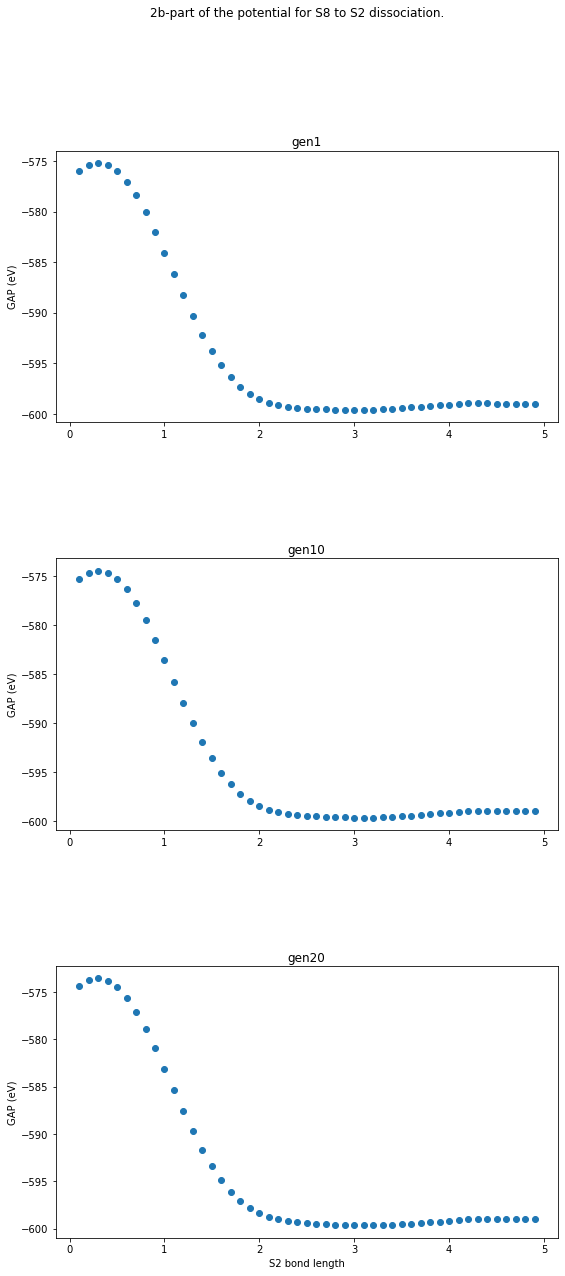

In [2]:

distances = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]

from ase.io import Trajectory
import numpy as np

import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(resultsDictS2),figsize=(9,20),gridspec_kw={'hspace':0.5})
fig.suptitle('2b-part of the potential for S8 to S2 dissociation. ')

counter = 0
for folder, energies in resultsDictS2.items():

    axs[counter].scatter(distances,energies)
    axs[counter].set_title(folder,pad=5)
    axs[counter].set_ylabel('GAP (eV)')
    
    
    counter+=1

axs[counter-1].set_xlabel('S2 bond length')
plt.show()